In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [6]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [7]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [8]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [9]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [10]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
sensor2 = sensor2.reshape(41, 16, 1)

In [14]:
sensor3 = sensor3.reshape(41, 16, 1)

In [15]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [16]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [17]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [18]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=16, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=16, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=16, activation='relu', name='thirdHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [19]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 8ms/step - loss: 1.2527 - rmse: 1.1038
Epoch 2/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2361 - rmse: 1.0963
Epoch 3/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2300 - rmse: 1.0935
Epoch 4/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2229 - rmse: 1.0903
Epoch 5/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2053 - rmse: 1.0822
Epoch 6/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2033 - rmse: 1.0812
Epoch 7/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1953 - rmse: 1.0775
Epoch 8/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1910 - rmse: 1.0756
Epoch 9/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1857 - rmse: 1.0731
Epoch 10/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1789 - rmse: 1.0699
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 7ms/step - loss: 0.8386 - rmse: 0.8978
Epoch 87/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8364 - rmse: 0.8965
Epoch 88/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8299 - rmse: 0.8929
Epoch 89/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8328 - rmse: 0.8946
Epoch 90/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8248 - rmse: 0.8901
Epoch 91/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8181 - rmse: 0.8863
Epoch 92/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.8178 - rmse: 0.8862
Epoch 93/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8176 - rmse: 0.8861
Epoch 94/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8114 - rmse: 0.8826
Epoch 95/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.8103 - rmse: 0.8820
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 7ms/step - loss: 0.4836 - rmse: 0.6726
Epoch 171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4788 - rmse: 0.6691
Epoch 172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4765 - rmse: 0.6674
Epoch 173/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4726 - rmse: 0.6644
Epoch 174/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4744 - rmse: 0.6658
Epoch 175/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4722 - rmse: 0.6642
Epoch 176/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4717 - rmse: 0.6638
Epoch 177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4698 - rmse: 0.6624
Epoch 178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4648 - rmse: 0.6586
Epoch 179/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4619 - rmse: 0.6564
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.3602 - rmse: 0.5747
Epoch 255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3554 - rmse: 0.5706
Epoch 256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3546 - rmse: 0.5698
Epoch 257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3568 - rmse: 0.5718
Epoch 258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3559 - rmse: 0.5710
Epoch 259/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3515 - rmse: 0.5671
Epoch 260/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3536 - rmse: 0.5691
Epoch 261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3506 - rmse: 0.5664
Epoch 262/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3526 - rmse: 0.5682
Epoch 263/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3502 - rmse: 0.5661
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.2862 - rmse: 0.5075
Epoch 339/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2855 - rmse: 0.5068
Epoch 340/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2842 - rmse: 0.5056
Epoch 341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2831 - rmse: 0.5045
Epoch 342/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2832 - rmse: 0.5046
Epoch 343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2818 - rmse: 0.5032
Epoch 344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2821 - rmse: 0.5035
Epoch 345/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2829 - rmse: 0.5043
Epoch 346/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2821 - rmse: 0.5036
Epoch 347/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2790 - rmse: 0.5005
Epoch 348/10000
2/2 [====================

2/2 [==============================] - 0s 11ms/step - loss: 0.2315 - rmse: 0.4517
Epoch 423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2304 - rmse: 0.4505
Epoch 424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2318 - rmse: 0.4521
Epoch 425/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2295 - rmse: 0.4496
Epoch 426/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2280 - rmse: 0.4479
Epoch 427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2279 - rmse: 0.4479
Epoch 428/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2254 - rmse: 0.4451
Epoch 429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2270 - rmse: 0.4468
Epoch 430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2250 - rmse: 0.4447
Epoch 431/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2262 - rmse: 0.4460
Epoch 432/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.1868 - rmse: 0.4007
Epoch 507/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1875 - rmse: 0.4016
Epoch 508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1876 - rmse: 0.4017
Epoch 509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1854 - rmse: 0.3990
Epoch 510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1861 - rmse: 0.3999
Epoch 511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1867 - rmse: 0.4006
Epoch 512/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1852 - rmse: 0.3988
Epoch 513/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1832 - rmse: 0.3963
Epoch 514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1872 - rmse: 0.4013
Epoch 515/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1849 - rmse: 0.3985
Epoch 516/10000
2/2 [==================

2/2 [==============================] - 0s 11ms/step - loss: 0.1548 - rmse: 0.3601
Epoch 591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1526 - rmse: 0.3571
Epoch 592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1526 - rmse: 0.3570
Epoch 593/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1537 - rmse: 0.3586
Epoch 594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1529 - rmse: 0.3575
Epoch 595/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1527 - rmse: 0.3573
Epoch 596/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1520 - rmse: 0.3564
Epoch 597/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1538 - rmse: 0.3589
Epoch 598/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1523 - rmse: 0.3567
Epoch 599/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1513 - rmse: 0.3554
Epoch 600/10000
2/2 [===================

2/2 [==============================] - 0s 7ms/step - loss: 0.1278 - rmse: 0.3221
Epoch 675/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1269 - rmse: 0.3207
Epoch 676/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1269 - rmse: 0.3207
Epoch 677/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1274 - rmse: 0.3215
Epoch 678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1260 - rmse: 0.3193
Epoch 679/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1280 - rmse: 0.3225
Epoch 680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1266 - rmse: 0.3203
Epoch 681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1265 - rmse: 0.3202
Epoch 682/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1259 - rmse: 0.3193
Epoch 683/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1272 - rmse: 0.3213
Epoch 684/10000
2/2 [===================

2/2 [==============================] - 0s 11ms/step - loss: 0.1065 - rmse: 0.2889
Epoch 759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1055 - rmse: 0.2872
Epoch 760/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1077 - rmse: 0.2910
Epoch 761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1062 - rmse: 0.2884
Epoch 762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1045 - rmse: 0.2856
Epoch 763/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1047 - rmse: 0.2859
Epoch 764/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1039 - rmse: 0.2846
Epoch 765/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1035 - rmse: 0.2838
Epoch 766/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1052 - rmse: 0.2868
Epoch 767/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1048 - rmse: 0.2861
Epoch 768/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.0882 - rmse: 0.2571
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0867 - rmse: 0.2542
Epoch 844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0868 - rmse: 0.2545
Epoch 845/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0889 - rmse: 0.2585
Epoch 846/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0891 - rmse: 0.2589
Epoch 847/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0863 - rmse: 0.2535
Epoch 848/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0859 - rmse: 0.2527
Epoch 849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0856 - rmse: 0.2523
Epoch 850/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0856 - rmse: 0.2522
Epoch 851/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0853 - rmse: 0.2516
Epoch 852/10000
2/2 [==================

2/2 [==============================] - 0s 11ms/step - loss: 0.0718 - rmse: 0.2250
Epoch 927/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0716 - rmse: 0.2245
Epoch 928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0715 - rmse: 0.2243
Epoch 929/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0727 - rmse: 0.2271
Epoch 930/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0711 - rmse: 0.2235
Epoch 931/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0733 - rmse: 0.2285
Epoch 932/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0723 - rmse: 0.2262
Epoch 933/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0722 - rmse: 0.2259
Epoch 934/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0717 - rmse: 0.2250
Epoch 935/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0703 - rmse: 0.2218
Epoch 936/10000
2/2 [==================

Epoch 1010/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0594 - rmse: 0.1977
Epoch 1011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0592 - rmse: 0.1972
Epoch 1012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0592 - rmse: 0.1973
Epoch 1013/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0606 - rmse: 0.2007
Epoch 1014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0605 - rmse: 0.2005
Epoch 1015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0587 - rmse: 0.1960
Epoch 1016/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0586 - rmse: 0.1958
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0601 - rmse: 0.1996
Epoch 1018/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0585 - rmse: 0.1956
Epoch 1019/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0607 - rmse: 0.2010
Epoch 1020/10

2/2 [==============================] - 0s 11ms/step - loss: 0.0515 - rmse: 0.1787
Epoch 1094/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0495 - rmse: 0.1732
Epoch 1095/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0499 - rmse: 0.1744
Epoch 1096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0494 - rmse: 0.1728
Epoch 1097/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0486 - rmse: 0.1706
Epoch 1098/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0493 - rmse: 0.1726
Epoch 1099/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0500 - rmse: 0.1748
Epoch 1100/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0480 - rmse: 0.1689
Epoch 1101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0483 - rmse: 0.1697
Epoch 1102/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0498 - rmse: 0.1741
Epoch 1103/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0415 - rmse: 0.1506
Epoch 1177/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0427 - rmse: 0.1547
Epoch 1178/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0411 - rmse: 0.1494
Epoch 1179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0410 - rmse: 0.1491
Epoch 1180/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0408 - rmse: 0.1487
Epoch 1181/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0426 - rmse: 0.1546
Epoch 1182/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0408 - rmse: 0.1484
Epoch 1183/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0408 - rmse: 0.1486
Epoch 1184/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0408 - rmse: 0.1487
Epoch 1185/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0430 - rmse: 0.1560
Epoch 1186/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - rmse: 0.1316
Epoch 1260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0359 - rmse: 0.1334
Epoch 1261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - rmse: 0.1347
Epoch 1262/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - rmse: 0.1316
Epoch 1263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0349 - rmse: 0.1299
Epoch 1264/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0350 - rmse: 0.1303
Epoch 1265/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - rmse: 0.1285
Epoch 1266/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0358 - rmse: 0.1334
Epoch 1267/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0346 - rmse: 0.1287
Epoch 1268/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0366 - rmse: 0.1365
Epoch 1269/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0304 - rmse: 0.1141
Epoch 1343/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0317 - rmse: 0.1196
Epoch 1344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0302 - rmse: 0.1134
Epoch 1345/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0323 - rmse: 0.1223
Epoch 1346/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0303 - rmse: 0.1140
Epoch 1347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0333 - rmse: 0.1264
Epoch 1348/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0303 - rmse: 0.1139
Epoch 1349/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0307 - rmse: 0.1155
Epoch 1350/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0299 - rmse: 0.1122
Epoch 1351/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0298 - rmse: 0.1118
Epoch 1352/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0280 - rmse: 0.1061
Epoch 1426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0269 - rmse: 0.1008
Epoch 1427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0262 - rmse: 0.0975
Epoch 1428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0273 - rmse: 0.1027
Epoch 1429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0266 - rmse: 0.0996
Epoch 1430/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0266 - rmse: 0.0994
Epoch 1431/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0260 - rmse: 0.0963
Epoch 1432/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0262 - rmse: 0.0974
Epoch 1433/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0257 - rmse: 0.0951
Epoch 1434/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0256 - rmse: 0.0944
Epoch 1435/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0244 - rmse: 0.0909
Epoch 1509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0230 - rmse: 0.0827
Epoch 1510/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0248 - rmse: 0.0930
Epoch 1511/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0260 - rmse: 0.0992
Epoch 1512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0242 - rmse: 0.0902
Epoch 1513/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0233 - rmse: 0.0847
Epoch 1514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0231 - rmse: 0.0839
Epoch 1515/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0235 - rmse: 0.0863
Epoch 1516/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0234 - rmse: 0.0857
Epoch 1517/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0236 - rmse: 0.0867
Epoch 1518/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0217 - rmse: 0.0782
Epoch 1592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0213 - rmse: 0.0757
Epoch 1593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0222 - rmse: 0.0814
Epoch 1594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0218 - rmse: 0.0790
Epoch 1595/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0211 - rmse: 0.0747
Epoch 1596/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0211 - rmse: 0.0746
Epoch 1597/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0221 - rmse: 0.0813
Epoch 1598/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0209 - rmse: 0.0734
Epoch 1599/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0229 - rmse: 0.0860
Epoch 1600/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0221 - rmse: 0.0810
Epoch 1601/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0203 - rmse: 0.0725
Epoch 1675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0192 - rmse: 0.0645
Epoch 1676/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0197 - rmse: 0.0685
Epoch 1677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0198 - rmse: 0.0691
Epoch 1678/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0194 - rmse: 0.0659
Epoch 1679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0197 - rmse: 0.0683
Epoch 1680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0191 - rmse: 0.0639
Epoch 1681/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0190 - rmse: 0.0631
Epoch 1682/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0210 - rmse: 0.0773
Epoch 1683/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0200 - rmse: 0.0707
Epoch 1684/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0179 - rmse: 0.0580
Epoch 1758/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0183 - rmse: 0.0611
Epoch 1759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0189 - rmse: 0.0660
Epoch 1760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0183 - rmse: 0.0609
Epoch 1761/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0192 - rmse: 0.0686
Epoch 1762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0197 - rmse: 0.0721
Epoch 1763/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0183 - rmse: 0.0612
Epoch 1764/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0182 - rmse: 0.0606
Epoch 1765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0199 - rmse: 0.0731
Epoch 1766/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0185 - rmse: 0.0634
Epoch 1767/10000
2/2 [==========

2/2 [==============================] - 0s 11ms/step - loss: 0.0172 - rmse: 0.0553
Epoch 1841/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0170 - rmse: 0.0543
Epoch 1842/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0176 - rmse: 0.0594
Epoch 1843/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0169 - rmse: 0.0535
Epoch 1844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0182 - rmse: 0.0641
Epoch 1845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0182 - rmse: 0.0643
Epoch 1846/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0182 - rmse: 0.0639
Epoch 1847/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0179 - rmse: 0.0623
Epoch 1848/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0178 - rmse: 0.0614
Epoch 1849/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0191 - rmse: 0.0709
Epoch 1850/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0186 - rmse: 0.0705
Epoch 1924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0169 - rmse: 0.0573
Epoch 1925/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0168 - rmse: 0.0565
Epoch 1926/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0170 - rmse: 0.0580
Epoch 1927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0191 - rmse: 0.0738
Epoch 1928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0163 - rmse: 0.0518
Epoch 1929/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0164 - rmse: 0.0524
Epoch 1930/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0164 - rmse: 0.0525
Epoch 1931/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0174 - rmse: 0.0619
Epoch 1932/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0163 - rmse: 0.0520
Epoch 1933/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0160 - rmse: 0.0526
Epoch 2007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0157 - rmse: 0.0496
Epoch 2008/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0154 - rmse: 0.0469
Epoch 2009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0177 - rmse: 0.0672
Epoch 2010/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0180 - rmse: 0.0689
Epoch 2011/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0166 - rmse: 0.0578
Epoch 2012/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0158 - rmse: 0.0506
Epoch 2013/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0159 - rmse: 0.0520
Epoch 2014/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0162 - rmse: 0.0545
Epoch 2015/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0160 - rmse: 0.0532
Epoch 2016/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0157 - rmse: 0.0536
Epoch 2090/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0154 - rmse: 0.0505
Epoch 2091/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0149 - rmse: 0.0458
Epoch 2092/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0147 - rmse: 0.0437
Epoch 2093/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0147 - rmse: 0.0438
Epoch 2094/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0172 - rmse: 0.0661
Epoch 2095/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0152 - rmse: 0.0485
Epoch 2096/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0149 - rmse: 0.0461
Epoch 2097/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0147 - rmse: 0.0435
Epoch 2098/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0149 - rmse: 0.0457
Epoch 2099/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0150 - rmse: 0.0506
Epoch 2173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0145 - rmse: 0.0460
Epoch 2174/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0142 - rmse: 0.0416
Epoch 2175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0141 - rmse: 0.0404
Epoch 2176/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0146 - rmse: 0.0468
Epoch 2177/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0155 - rmse: 0.0556
Epoch 2178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0145 - rmse: 0.0452
Epoch 2179/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0149 - rmse: 0.0496
Epoch 2180/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0142 - rmse: 0.0426
Epoch 2181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0150 - rmse: 0.0511
Epoch 2182/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0136 - rmse: 0.0398
Epoch 2256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0148 - rmse: 0.0523
Epoch 2257/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0156 - rmse: 0.0593
Epoch 2258/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0158 - rmse: 0.0609
Epoch 2259/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0139 - rmse: 0.0431
Epoch 2260/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0159 - rmse: 0.0618
Epoch 2261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0142 - rmse: 0.0464
Epoch 2262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0141 - rmse: 0.0459
Epoch 2263/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0144 - rmse: 0.0486
Epoch 2264/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0142 - rmse: 0.0464
Epoch 2265/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0132 - rmse: 0.0388
Epoch 2339/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0132 - rmse: 0.0381
Epoch 2340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0145 - rmse: 0.0532
Epoch 2341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0132 - rmse: 0.0386
Epoch 2342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0132 - rmse: 0.0384
Epoch 2343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0131 - rmse: 0.0377
Epoch 2344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0135 - rmse: 0.0423
Epoch 2345/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0143 - rmse: 0.0517
Epoch 2346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0148 - rmse: 0.0559
Epoch 2347/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0133 - rmse: 0.0410
Epoch 2348/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0136 - rmse: 0.0472
Epoch 2422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0135 - rmse: 0.0460
Epoch 2423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0134 - rmse: 0.0451
Epoch 2424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0136 - rmse: 0.0480
Epoch 2425/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0130 - rmse: 0.0411
Epoch 2426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0127 - rmse: 0.0368
Epoch 2427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0138 - rmse: 0.0498
Epoch 2428/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0128 - rmse: 0.0386
Epoch 2429/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0152 - rmse: 0.0621
Epoch 2430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0158 - rmse: 0.0672
Epoch 2431/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0121 - rmse: 0.0328
Epoch 2505/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0133 - rmse: 0.0481
Epoch 2506/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0124 - rmse: 0.0368
Epoch 2507/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0121 - rmse: 0.0327
Epoch 2508/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0120 - rmse: 0.0324
Epoch 2509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0131 - rmse: 0.0454
Epoch 2510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0125 - rmse: 0.0389
Epoch 2511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0129 - rmse: 0.0434
Epoch 2512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0123 - rmse: 0.0364
Epoch 2513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0122 - rmse: 0.0348
Epoch 2514/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0124 - rmse: 0.0414
Epoch 2588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0127 - rmse: 0.0454
Epoch 2589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0122 - rmse: 0.0388
Epoch 2590/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0122 - rmse: 0.0391
Epoch 2591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0132 - rmse: 0.0508
Epoch 2592/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0124 - rmse: 0.0418
Epoch 2593/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0121 - rmse: 0.0382
Epoch 2594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0120 - rmse: 0.0360
Epoch 2595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0118 - rmse: 0.0341
Epoch 2596/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0123 - rmse: 0.0410
Epoch 2597/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0114 - rmse: 0.0327
Epoch 2671/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0115 - rmse: 0.0335
Epoch 2672/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0116 - rmse: 0.0358
Epoch 2673/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0116 - rmse: 0.0349
Epoch 2674/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0136 - rmse: 0.0567
Epoch 2675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0124 - rmse: 0.0450
Epoch 2676/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0113 - rmse: 0.0315
Epoch 2677/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0117 - rmse: 0.0368
Epoch 2678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0115 - rmse: 0.0344
Epoch 2679/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0131 - rmse: 0.0523
Epoch 2680/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0142 - rmse: 0.0645
Epoch 2754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0112 - rmse: 0.0343
Epoch 2755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0113 - rmse: 0.0350
Epoch 2756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0111 - rmse: 0.0330
Epoch 2757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0113 - rmse: 0.0362
Epoch 2758/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0111 - rmse: 0.0334
Epoch 2759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0114 - rmse: 0.0367
Epoch 2760/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0116 - rmse: 0.0396
Epoch 2761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0110 - rmse: 0.0316
Epoch 2762/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0109 - rmse: 0.0301
Epoch 2763/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0128 - rmse: 0.0550
Epoch 2837/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.0367
Epoch 2838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0110 - rmse: 0.0354
Epoch 2839/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0108 - rmse: 0.0325
Epoch 2840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0114 - rmse: 0.0414
Epoch 2841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0111 - rmse: 0.0371
Epoch 2842/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0111 - rmse: 0.0369
Epoch 2843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0106 - rmse: 0.0288
Epoch 2844/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0108 - rmse: 0.0335
Epoch 2845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0109 - rmse: 0.0345
Epoch 2846/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0123 - rmse: 0.0529
Epoch 2920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0104 - rmse: 0.0310
Epoch 2921/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0113 - rmse: 0.0433
Epoch 2922/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0106 - rmse: 0.0343
Epoch 2923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0103 - rmse: 0.0292
Epoch 2924/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0104 - rmse: 0.0313
Epoch 2925/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0102 - rmse: 0.0278
Epoch 2926/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0104 - rmse: 0.0306
Epoch 2927/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0104 - rmse: 0.0306
Epoch 2928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0107 - rmse: 0.0354
Epoch 2929/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0283
Epoch 3003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0103 - rmse: 0.0340
Epoch 3004/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0100 - rmse: 0.0287
Epoch 3005/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0110 - rmse: 0.0425
Epoch 3006/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0101 - rmse: 0.0307
Epoch 3007/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0115 - rmse: 0.0487
Epoch 3008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0300
Epoch 3009/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0104 - rmse: 0.0358
Epoch 3010/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0124 - rmse: 0.0573
Epoch 3011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0103 - rmse: 0.0341
Epoch 3012/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0275
Epoch 3086/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0252
Epoch 3087/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0103 - rmse: 0.0378
Epoch 3088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0106 - rmse: 0.0413
Epoch 3089/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0099 - rmse: 0.0319
Epoch 3090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0255
Epoch 3091/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0121 - rmse: 0.0565
Epoch 3092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0314
Epoch 3093/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0262
Epoch 3094/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0103 - rmse: 0.0385
Epoch 3095/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0334
Epoch 3169/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0315
Epoch 3170/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0322
Epoch 3171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0246
Epoch 3172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0115 - rmse: 0.0542
Epoch 3173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0107 - rmse: 0.0459
Epoch 3174/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0223
Epoch 3175/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0291
Epoch 3176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0287
Epoch 3177/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - rmse: 0.0331
Epoch 3178/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0104 - rmse: 0.0457
Epoch 3252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0273
Epoch 3253/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0090 - rmse: 0.0251
Epoch 3254/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0278
Epoch 3255/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0219
Epoch 3256/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0361
Epoch 3257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0205
Epoch 3258/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0319
Epoch 3259/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0196
Epoch 3260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0385
Epoch 3261/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0093 - rmse: 0.0350
Epoch 3335/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0203
Epoch 3336/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0320
Epoch 3337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0256
Epoch 3338/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0309
Epoch 3339/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0319
Epoch 3340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0263
Epoch 3341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0319
Epoch 3342/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0086 - rmse: 0.0243
Epoch 3343/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0085 - rmse: 0.0208
Epoch 3344/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0087 - rmse: 0.0298
Epoch 3418/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0356
Epoch 3419/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0226
Epoch 3420/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0088 - rmse: 0.0319
Epoch 3421/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0279
Epoch 3422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0334
Epoch 3423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0231
Epoch 3424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0097 - rmse: 0.0430
Epoch 3425/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0083 - rmse: 0.0218
Epoch 3426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0256
Epoch 3427/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0159
Epoch 3501/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0087 - rmse: 0.0339
Epoch 3502/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0079 - rmse: 0.0173
Epoch 3503/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0165
Epoch 3504/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0219
Epoch 3505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0433
Epoch 3506/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0161
Epoch 3507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0326
Epoch 3508/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0168
Epoch 3509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0177
Epoch 3510/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0268
Epoch 3584/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0239
Epoch 3585/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0082 - rmse: 0.0298
Epoch 3586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0320
Epoch 3587/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0158
Epoch 3588/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0078 - rmse: 0.0219
Epoch 3589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0154
Epoch 3590/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0335
Epoch 3591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0241
Epoch 3592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0171
Epoch 3593/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0255
Epoch 3667/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0168
Epoch 3668/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0300
Epoch 3669/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0074 - rmse: 0.0171
Epoch 3670/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0182
Epoch 3671/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0208
Epoch 3672/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0159
Epoch 3673/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0143
Epoch 3674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0334
Epoch 3675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0256
Epoch 3676/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0244
Epoch 3750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0231
Epoch 3751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0502
Epoch 3752/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0186
Epoch 3753/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0343
Epoch 3754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0190
Epoch 3755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0219
Epoch 3756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0351
Epoch 3757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0151
Epoch 3758/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0359
Epoch 3759/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0130
Epoch 3833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0488
Epoch 3834/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0209
Epoch 3835/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0368
Epoch 3836/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0295
Epoch 3837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0461
Epoch 3838/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0292
Epoch 3839/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0247
Epoch 3840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0232
Epoch 3841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0315
Epoch 3842/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0130
Epoch 3916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0371
Epoch 3917/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0404
Epoch 3918/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0249
Epoch 3919/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0264
Epoch 3920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0309
Epoch 3921/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0239
Epoch 3922/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0260
Epoch 3923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0342
Epoch 3924/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0167
Epoch 3925/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0317
Epoch 3999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0355
Epoch 4000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0178
Epoch 4001/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0185
Epoch 4002/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0314
Epoch 4003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0211
Epoch 4004/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0150
Epoch 4005/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0317
Epoch 4006/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0317
Epoch 4007/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0253
Epoch 4008/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0239
Epoch 4082/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0265
Epoch 4083/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0304
Epoch 4084/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0228
Epoch 4085/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0240
Epoch 4086/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0180
Epoch 4087/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0434
Epoch 4088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0216
Epoch 4089/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0178
Epoch 4090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0121
Epoch 4091/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0080 - rmse: 0.0465
Epoch 4165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0112
Epoch 4166/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0188
Epoch 4167/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0077 - rmse: 0.0429
Epoch 4168/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0126
Epoch 4169/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0198
Epoch 4170/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0079 - rmse: 0.0462
Epoch 4171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0289
Epoch 4172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0315
Epoch 4173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0341
Epoch 4174/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0170
Epoch 4248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0207
Epoch 4249/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0102
Epoch 4250/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0322
Epoch 4251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0102
Epoch 4252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0132
Epoch 4253/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0118
Epoch 4254/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0420
Epoch 4255/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0205
Epoch 4256/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0144
Epoch 4257/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0131
Epoch 4331/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0227
Epoch 4332/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0115
Epoch 4333/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0456
Epoch 4334/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0116
Epoch 4335/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0309
Epoch 4336/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0208
Epoch 4337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0114
Epoch 4338/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0423
Epoch 4339/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0331
Epoch 4340/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0085
Epoch 4414/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0133
Epoch 4415/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0086
Epoch 4416/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0310
Epoch 4417/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0326
Epoch 4418/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0448
Epoch 4419/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0222
Epoch 4420/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0379
Epoch 4421/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0475
Epoch 4422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0127
Epoch 4423/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0120
Epoch 4497/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0295
Epoch 4498/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0208
Epoch 4499/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0227
Epoch 4500/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0154
Epoch 4501/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0324
Epoch 4502/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0106
Epoch 4503/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0203
Epoch 4504/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0199
Epoch 4505/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0204
Epoch 4506/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0133
Epoch 4580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0230
Epoch 4581/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0302
Epoch 4582/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0305
Epoch 4583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0129
Epoch 4584/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0226
Epoch 4585/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0118
Epoch 4586/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0452
Epoch 4587/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0301
Epoch 4588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0263
Epoch 4589/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0088
Epoch 4663/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0267
Epoch 4664/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0222
Epoch 4665/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0264
Epoch 4666/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0142
Epoch 4667/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0303
Epoch 4668/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0088
Epoch 4669/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0295
Epoch 4670/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0141
Epoch 4671/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0241
Epoch 4672/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0247
Epoch 4746/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0299
Epoch 4747/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0157
Epoch 4748/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0178
Epoch 4749/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0415
Epoch 4750/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0246
Epoch 4751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0113
Epoch 4752/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0448
Epoch 4753/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0168
Epoch 4754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0093
Epoch 4755/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0326
Epoch 4829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0298
Epoch 4830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0269
Epoch 4831/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0140
Epoch 4832/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0228
Epoch 4833/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0299
Epoch 4834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0185
Epoch 4835/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0148
Epoch 4836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0421
Epoch 4837/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0244
Epoch 4838/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0280
Epoch 4912/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0080
Epoch 4913/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0195
Epoch 4914/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0162
Epoch 4915/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0327
Epoch 4916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0093
Epoch 4917/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0281
Epoch 4918/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0081
Epoch 4919/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0069
Epoch 4920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0077
Epoch 4921/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0117
Epoch 4995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0306
Epoch 4996/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0186
Epoch 4997/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0104
Epoch 4998/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0322
Epoch 4999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0194
Epoch 5000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0335
Epoch 5001/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0215
Epoch 5002/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0265
Epoch 5003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0292
Epoch 5004/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0100
Epoch 5078/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0041 - rmse: 0.0083
Epoch 5079/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0298
Epoch 5080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0204
Epoch 5081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0084
Epoch 5082/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0081
Epoch 5083/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0219
Epoch 5084/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0481
Epoch 5085/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0263
Epoch 5086/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0064
Epoch 5087/10000
2/2 [==========

2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0319
Epoch 5161/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0322
Epoch 5162/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0304
Epoch 5163/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0304
Epoch 5164/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0121
Epoch 5165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0443
Epoch 5166/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0219
Epoch 5167/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0192
Epoch 5168/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0059 - rmse: 0.0444
Epoch 5169/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0322
Epoch 5170/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0309
Epoch 5244/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0113
Epoch 5245/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0102
Epoch 5246/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0234
Epoch 5247/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0261
Epoch 5248/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0272
Epoch 5249/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0189
Epoch 5250/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0203
Epoch 5251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0203
Epoch 5252/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0259
Epoch 5253/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0124
Epoch 5327/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0270
Epoch 5328/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0281
Epoch 5329/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0256
Epoch 5330/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0218
Epoch 5331/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0448
Epoch 5332/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0225
Epoch 5333/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0444
Epoch 5334/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0310
Epoch 5335/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0110
Epoch 5336/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0105
Epoch 5410/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0182
Epoch 5411/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0078
Epoch 5412/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0071
Epoch 5413/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0072
Epoch 5414/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0201
Epoch 5415/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0199
Epoch 5416/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0297
Epoch 5417/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0309
Epoch 5418/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0333
Epoch 5419/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0192
Epoch 5493/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0323
Epoch 5494/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0216
Epoch 5495/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0177
Epoch 5496/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0156
Epoch 5497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0269
Epoch 5498/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0107
Epoch 5499/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0217
Epoch 5500/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0108
Epoch 5501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0241
Epoch 5502/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0203
Epoch 5576/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0308
Epoch 5577/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0149
Epoch 5578/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0150
Epoch 5579/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0331
Epoch 5580/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0320
Epoch 5581/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0378
Epoch 5582/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0193
Epoch 5583/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0145
Epoch 5584/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0285
Epoch 5585/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0129
Epoch 5659/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0098
Epoch 5660/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0443
Epoch 5661/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0086
Epoch 5662/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0069
Epoch 5663/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0322
Epoch 5664/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0190
Epoch 5665/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0279
Epoch 5666/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0296
Epoch 5667/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0207
Epoch 5668/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0121
Epoch 5742/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0212
Epoch 5743/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0120
Epoch 5744/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0123
Epoch 5745/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0326
Epoch 5746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0124
Epoch 5747/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0321
Epoch 5748/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0257
Epoch 5749/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0394
Epoch 5750/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0341
Epoch 5751/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0083
Epoch 5825/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0481
Epoch 5826/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0189
Epoch 5827/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0103
Epoch 5828/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0169
Epoch 5829/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0477
Epoch 5830/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0169
Epoch 5831/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0329
Epoch 5832/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0215
Epoch 5833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0277
Epoch 5834/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0230
Epoch 5908/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0122
Epoch 5909/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0274
Epoch 5910/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0272
Epoch 5911/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0126
Epoch 5912/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0290
Epoch 5913/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0483
Epoch 5914/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0261
Epoch 5915/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0127
Epoch 5916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0124
Epoch 5917/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0090
Epoch 5991/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0325
Epoch 5992/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0264
Epoch 5993/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0174
Epoch 5994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0119
Epoch 5995/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0168
Epoch 5996/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0105
Epoch 5997/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0245
Epoch 5998/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0091
Epoch 5999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0416
Epoch 6000/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0127
Epoch 6074/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0334
Epoch 6075/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0310
Epoch 6076/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0197
Epoch 6077/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0142
Epoch 6078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0284
Epoch 6079/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0126
Epoch 6080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0344
Epoch 6081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0133
Epoch 6082/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0278
Epoch 6083/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0319
Epoch 6157/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0062
Epoch 6158/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0058
Epoch 6159/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0100
Epoch 6160/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0100
Epoch 6161/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0412
Epoch 6162/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0264
Epoch 6163/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0244
Epoch 6164/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0181
Epoch 6165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0088
Epoch 6166/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0376
Epoch 6240/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0077
Epoch 6241/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0268
Epoch 6242/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0315
Epoch 6243/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0078
Epoch 6244/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0302
Epoch 6245/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0174
Epoch 6246/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0410
Epoch 6247/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0142
Epoch 6248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0328
Epoch 6249/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0097
Epoch 6323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0169
Epoch 6324/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 6325/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0082
Epoch 6326/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0319
Epoch 6327/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0236
Epoch 6328/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0233
Epoch 6329/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0325
Epoch 6330/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0302
Epoch 6331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0116
Epoch 6332/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0110
Epoch 6406/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0153
Epoch 6407/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0112
Epoch 6408/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0152
Epoch 6409/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0416
Epoch 6410/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0115
Epoch 6411/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0118
Epoch 6412/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0088
Epoch 6413/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0414
Epoch 6414/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0445
Epoch 6415/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0443
Epoch 6489/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0315
Epoch 6490/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0108
Epoch 6491/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0122
Epoch 6492/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0114
Epoch 6493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0279
Epoch 6494/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0137
Epoch 6495/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0290
Epoch 6496/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0169
Epoch 6497/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0131
Epoch 6498/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0127
Epoch 6572/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0183
Epoch 6573/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0317
Epoch 6574/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0208
Epoch 6575/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0190
Epoch 6576/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0228
Epoch 6577/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0202
Epoch 6578/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0303
Epoch 6579/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0276
Epoch 6580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0182
Epoch 6581/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0272
Epoch 6655/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0239
Epoch 6656/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0095
Epoch 6657/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0267
Epoch 6658/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0178
Epoch 6659/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0096
Epoch 6660/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0478
Epoch 6661/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0323
Epoch 6662/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0261
Epoch 6663/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0267
Epoch 6664/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0320
Epoch 6738/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0085
Epoch 6739/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0163
Epoch 6740/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0319
Epoch 6741/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0320
Epoch 6742/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0278
Epoch 6743/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0179
Epoch 6744/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0303
Epoch 6745/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0115
Epoch 6746/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0249
Epoch 6747/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0270
Epoch 6821/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0082
Epoch 6822/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0032 - rmse: 0.0319
Epoch 6823/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0232
Epoch 6824/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0113
Epoch 6825/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0382
Epoch 6826/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0266
Epoch 6827/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0178
Epoch 6828/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0088
Epoch 6829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0080
Epoch 6830/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0263
Epoch 6904/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0280
Epoch 6905/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0107
Epoch 6906/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0265
Epoch 6907/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0303
Epoch 6908/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0237
Epoch 6909/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0262
Epoch 6910/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0156
Epoch 6911/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0296
Epoch 6912/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0068
Epoch 6913/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0249
Epoch 6987/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0292
Epoch 6988/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0190
Epoch 6989/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0097
Epoch 6990/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0475
Epoch 6991/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0074
Epoch 6992/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0121
Epoch 6993/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0328
Epoch 6994/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0317
Epoch 6995/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0193
Epoch 6996/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0262
Epoch 7070/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0271
Epoch 7071/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0105
Epoch 7072/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0213
Epoch 7073/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0122
Epoch 7074/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0164
Epoch 7075/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0293
Epoch 7076/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0114
Epoch 7077/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0220
Epoch 7078/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0315
Epoch 7079/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0096
Epoch 7153/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0208
Epoch 7154/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0303
Epoch 7155/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0218
Epoch 7156/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0413
Epoch 7157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0084
Epoch 7158/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0085
Epoch 7159/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0292
Epoch 7160/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0328
Epoch 7161/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0328
Epoch 7162/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0075
Epoch 7236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0318
Epoch 7237/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0114
Epoch 7238/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0443
Epoch 7239/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0378
Epoch 7240/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0272
Epoch 7241/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0114
Epoch 7242/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0096
Epoch 7243/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0227
Epoch 7244/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0295
Epoch 7245/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0169
Epoch 7319/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0095
Epoch 7320/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0080
Epoch 7321/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0411
Epoch 7322/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0095
Epoch 7323/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0212
Epoch 7324/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0099
Epoch 7325/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0193
Epoch 7326/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0478
Epoch 7327/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0408
Epoch 7328/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0292
Epoch 7402/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0212
Epoch 7403/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0329
Epoch 7404/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0176
Epoch 7405/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0316
Epoch 7406/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0410
Epoch 7407/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0293
Epoch 7408/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0292
Epoch 7409/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0202
Epoch 7410/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0318
Epoch 7411/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0127
Epoch 7485/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0195
Epoch 7486/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0251
Epoch 7487/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0210
Epoch 7488/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0487
Epoch 7489/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0189
Epoch 7490/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0256
Epoch 7491/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0452
Epoch 7492/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0293
Epoch 7493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0141
Epoch 7494/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0231
Epoch 7568/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0158
Epoch 7569/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0251
Epoch 7570/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0264
Epoch 7571/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0146
Epoch 7572/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0248
Epoch 7573/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0162
Epoch 7574/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0206
Epoch 7575/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0139
Epoch 7576/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0317
Epoch 7577/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0447
Epoch 7651/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0224
Epoch 7652/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0109
Epoch 7653/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0473
Epoch 7654/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0320
Epoch 7655/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0149
Epoch 7656/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0231
Epoch 7657/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0334
Epoch 7658/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0109
Epoch 7659/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0179
Epoch 7660/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0236
Epoch 7734/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0248
Epoch 7735/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0325
Epoch 7736/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0190
Epoch 7737/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0161
Epoch 7738/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0077
Epoch 7739/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0157
Epoch 7740/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0295
Epoch 7741/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0066
Epoch 7742/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0181
Epoch 7743/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0083
Epoch 7817/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0268
Epoch 7818/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0322
Epoch 7819/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0066
Epoch 7820/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0304
Epoch 7821/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0329
Epoch 7822/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0162
Epoch 7823/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0302
Epoch 7824/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0172
Epoch 7825/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0247
Epoch 7826/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0250
Epoch 7900/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0378
Epoch 7901/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0094
Epoch 7902/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0158
Epoch 7903/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0233
Epoch 7904/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0269
Epoch 7905/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0187
Epoch 7906/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0065
Epoch 7907/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0186
Epoch 7908/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0193
Epoch 7909/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0328
Epoch 7983/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0067
Epoch 7984/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0084
Epoch 7985/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0222
Epoch 7986/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0171
Epoch 7987/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0197
Epoch 7988/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0317
Epoch 7989/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0193
Epoch 7990/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0378
Epoch 7991/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0193
Epoch 7992/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0090
Epoch 8066/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0334
Epoch 8067/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0273
Epoch 8068/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0094
Epoch 8069/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0207
Epoch 8070/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0217
Epoch 8071/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0111
Epoch 8072/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0201
Epoch 8073/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0274
Epoch 8074/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0304
Epoch 8075/10000
2/2 [===========

2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0231
Epoch 8149/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0321
Epoch 8150/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0131
Epoch 8151/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0133
Epoch 8152/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0132
Epoch 8153/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0233
Epoch 8154/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0218
Epoch 8155/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0137
Epoch 8156/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0298
Epoch 8157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0130
Epoch 8158/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0292
Epoch 8232/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0226
Epoch 8233/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0098
Epoch 8234/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0191
Epoch 8235/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0317
Epoch 8236/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0319
Epoch 8237/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0317
Epoch 8238/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0181
Epoch 8239/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0442
Epoch 8240/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0107
Epoch 8241/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0207
Epoch 8315/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0436
Epoch 8316/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0167
Epoch 8317/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0281
Epoch 8318/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0237
Epoch 8319/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0158
Epoch 8320/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0444
Epoch 8321/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0322
Epoch 8322/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0471
Epoch 8323/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0151
Epoch 8324/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0235
Epoch 8398/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0395
Epoch 8399/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0229
Epoch 8400/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0383
Epoch 8401/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0273
Epoch 8402/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0104
Epoch 8403/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0222
Epoch 8404/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0305
Epoch 8405/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0207
Epoch 8406/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0274
Epoch 8407/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0192
Epoch 8481/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0453
Epoch 8482/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0344
Epoch 8483/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0284
Epoch 8484/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0132
Epoch 8485/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0175
Epoch 8486/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0393
Epoch 8487/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0136
Epoch 8488/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0250
Epoch 8489/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0394
Epoch 8490/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0111
Epoch 8564/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0476
Epoch 8565/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0122
Epoch 8566/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0155
Epoch 8567/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0266
Epoch 8568/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0295
Epoch 8569/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0122
Epoch 8570/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0187
Epoch 8571/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0306
Epoch 8572/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0122
Epoch 8573/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0292
Epoch 8647/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0222
Epoch 8648/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0160
Epoch 8649/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0409
Epoch 8650/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0208
Epoch 8651/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0315
Epoch 8652/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0440
Epoch 8653/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0165
Epoch 8654/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0090
Epoch 8655/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0303
Epoch 8656/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0316
Epoch 8730/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0206
Epoch 8731/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0173
Epoch 8732/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0476
Epoch 8733/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0328
Epoch 8734/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0101
Epoch 8735/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0071
Epoch 8736/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0223
Epoch 8737/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0307
Epoch 8738/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0192
Epoch 8739/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0159
Epoch 8813/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0445
Epoch 8814/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0379
Epoch 8815/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0284
Epoch 8816/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0078
Epoch 8817/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0182
Epoch 8818/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0281
Epoch 8819/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0148
Epoch 8820/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0103
Epoch 8821/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0198
Epoch 8822/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0408
Epoch 8896/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0314
Epoch 8897/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0084
Epoch 8898/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0255
Epoch 8899/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0281
Epoch 8900/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0303
Epoch 8901/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0321
Epoch 8902/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0294
Epoch 8903/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0264
Epoch 8904/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0142
Epoch 8905/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0212
Epoch 8979/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0177
Epoch 8980/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0072
Epoch 8981/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0379
Epoch 8982/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0236
Epoch 8983/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0060
Epoch 8984/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0065
Epoch 8985/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0290
Epoch 8986/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0108
Epoch 8987/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0096
Epoch 8988/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0093
Epoch 9062/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0087
Epoch 9063/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0216
Epoch 9064/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0127
Epoch 9065/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0278
Epoch 9066/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0115
Epoch 9067/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0336
Epoch 9068/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0287
Epoch 9069/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0218
Epoch 9070/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0206
Epoch 9071/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0161
Epoch 9145/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0376
Epoch 9146/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0317
Epoch 9147/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0072
Epoch 9148/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0438
Epoch 9149/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0203
Epoch 9150/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0073
Epoch 9151/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0443
Epoch 9152/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0294
Epoch 9153/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0194
Epoch 9154/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0190
Epoch 9228/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0126
Epoch 9229/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 9230/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0147
Epoch 9231/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0144
Epoch 9232/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0128
Epoch 9233/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0122
Epoch 9234/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0124
Epoch 9235/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0303
Epoch 9236/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0303
Epoch 9237/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0128
Epoch 9311/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0181
Epoch 9312/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0252
Epoch 9313/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 9314/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0208
Epoch 9315/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0388
Epoch 9316/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0265
Epoch 9317/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0301
Epoch 9318/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0279
Epoch 9319/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0206
Epoch 9320/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0166
Epoch 9394/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0093
Epoch 9395/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0095
Epoch 9396/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0412
Epoch 9397/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0138
Epoch 9398/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0281
Epoch 9399/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0211
Epoch 9400/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0256
Epoch 9401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0118
Epoch 9402/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0196
Epoch 9403/10000
2/2 [========

Epoch 9476/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0240
Epoch 9477/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0168
Epoch 9478/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.8639e-04 - rmse: 0.0070
Epoch 9479/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0098
Epoch 9480/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8095e-04 - rmse: 0.0066
Epoch 9481/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0307
Epoch 9482/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0144
Epoch 9483/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0278
Epoch 9484/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.8343e-04 - rmse: 0.0069
Epoch 9485/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0098
Ep

2/2 [==============================] - 0s 12ms/step - loss: 9.4583e-04 - rmse: 0.0058
Epoch 9559/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0158
Epoch 9560/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0379
Epoch 9561/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0437
Epoch 9562/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0321
Epoch 9563/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0191
Epoch 9564/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0329
Epoch 9565/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0252
Epoch 9566/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7216e-04 - rmse: 0.0079
Epoch 9567/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0378
Epoch 9568/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0193
Epoch 9641/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0106
Epoch 9642/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0267
Epoch 9643/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0293
Epoch 9644/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0319
Epoch 9645/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.9650e-04 - rmse: 0.0105
Epoch 9646/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.6179e-04 - rmse: 0.0087
Epoch 9647/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0189
Epoch 9648/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0409
Epoch 9649/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.3750e-04 - rmse: 0.0072
Epoch 9650/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0329
Epoch 9723/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0191
Epoch 9724/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0266
Epoch 9725/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0202
Epoch 9726/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0292
Epoch 9727/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0262
Epoch 9728/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0186
Epoch 9729/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0406
Epoch 9730/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.7949e-04 - rmse: 0.0108
Epoch 9731/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0178
Epoch 9732/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0276
Epoch 9805/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0188
Epoch 9806/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0280
Epoch 9807/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2871e-04 - rmse: 0.0093
Epoch 9808/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0294
Epoch 9809/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0329
Epoch 9810/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0289
Epoch 9811/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0318
Epoch 9812/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0278
Epoch 9813/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0249
Epoch 9814/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0281
Epoch 9887/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0444
Epoch 9888/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2050e-04 - rmse: 0.0100
Epoch 9889/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.6030e-04 - rmse: 0.0118
Epoch 9890/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.7204e-04 - rmse: 0.0123
Epoch 9891/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0226
Epoch 9892/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.1421e-04 - rmse: 0.0097
Epoch 9893/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0418
Epoch 9894/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0413
Epoch 9895/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0282
Epoch 9896/100

2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0441
Epoch 9969/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0471
Epoch 9970/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0218
Epoch 9971/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.8138e-04 - rmse: 0.0090
Epoch 9972/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0165
Epoch 9973/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0412
Epoch 9974/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0329
Epoch 9975/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0319
Epoch 9976/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0264
Epoch 9977/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4482e-04 - rmse: 0.0067
Epoch 9978/10000
2/2 [=

In [21]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:03:41.592396


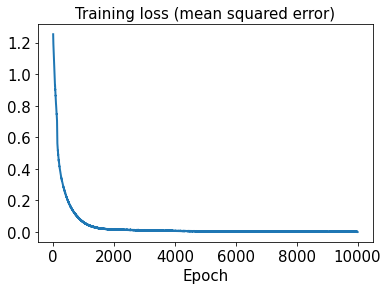

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

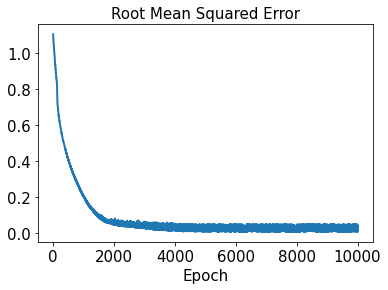

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
decoded_sensor_train1 = sensor_pred1.predict(t_train)

In [25]:
decoded_sensor_test1 = sensor_pred1.predict(t_test)

In [26]:
error_train_abs1 = np.abs(decoded_sensor_train1 - x_train1)

In [27]:
error_test_abs1 = np.abs(decoded_sensor_test1 - x_test1)

In [28]:
error_train_abs1

array([[[0.16803055],
        [0.10414425],
        [0.08777124],
        [0.05957621],
        [0.13613622],
        [0.11156821],
        [0.05906615],
        [0.05500081],
        [0.0364638 ],
        [0.02852941],
        [0.09247201],
        [0.07570043],
        [0.07912242],
        [0.11022466],
        [0.03457144],
        [0.09104654]],

       [[0.11673739],
        [0.03035414],
        [0.14481432],
        [0.11073876],
        [0.0183892 ],
        [0.19452979],
        [0.01330265],
        [0.20948202],
        [0.18286032],
        [0.15675723],
        [0.22331598],
        [0.03994703],
        [0.19257022],
        [0.18021918],
        [0.02237871],
        [0.21638038]],

       [[0.14117299],
        [0.06324826],
        [0.05691933],
        [0.03322431],
        [0.0962938 ],
        [0.08406095],
        [0.0475502 ],
        [0.04898825],
        [0.02388864],
        [0.03057084],
        [0.0528398 ],
        [0.03654277],
        [0.0398114 ],
      

In [29]:
l2_error_sensor_train1 = np.sqrt(np.sum((decoded_sensor_train1 - x_train1)**2) / np.sum(x_train1**2))
print(l2_error_sensor_train1)

0.24906036956111915


In [30]:
l2_error_sensor_test1 = np.sqrt(np.sum((decoded_sensor_test1 - x_test1)**2) / np.sum(x_test1**2))
print(l2_error_sensor_test1)

0.2837927829528335


In [31]:
sensor_pred2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [32]:
start2 = datetime.datetime.now()
history2 = sensor_pred2.fit(t_train, x_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 12ms/step - loss: 2.5901 - rmse: 1.6091
Epoch 2/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5802 - rmse: 1.6060
Epoch 3/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.5716 - rmse: 1.6034
Epoch 4/10000
2/2 [==============================] - 0s 20ms/step - loss: 2.5626 - rmse: 1.6006
Epoch 5/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5540 - rmse: 1.5979
Epoch 6/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.5462 - rmse: 1.5954
Epoch 7/10000
2/2 [==============================] - 0s 20ms/step - loss: 2.5373 - rmse: 1.5927
Epoch 8/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5298 - rmse: 1.5903
Epoch 9/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.5216 - rmse: 1.5877
Epoch 10/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.5146 - rmse: 1.5855
Epoch 11/10000
2/2 [====================

2/2 [==============================] - 0s 7ms/step - loss: 2.2642 - rmse: 1.5045
Epoch 87/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2590 - rmse: 1.5027
Epoch 88/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2574 - rmse: 1.5022
Epoch 89/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2556 - rmse: 1.5016
Epoch 90/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2507 - rmse: 1.5000
Epoch 91/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2489 - rmse: 1.4994
Epoch 92/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2468 - rmse: 1.4987
Epoch 93/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2459 - rmse: 1.4984
Epoch 94/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2415 - rmse: 1.4969
Epoch 95/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2366 - rmse: 1.4953
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 11ms/step - loss: 2.0442 - rmse: 1.4295
Epoch 171/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0433 - rmse: 1.4292
Epoch 172/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0421 - rmse: 1.4288
Epoch 173/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0342 - rmse: 1.4260
Epoch 174/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0326 - rmse: 1.4254
Epoch 175/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0303 - rmse: 1.4246
Epoch 176/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0294 - rmse: 1.4243
Epoch 177/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0290 - rmse: 1.4241
Epoch 178/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.0245 - rmse: 1.4226
Epoch 179/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0206 - rmse: 1.4212
Epoch 180/10000
2/2 [===================

2/2 [==============================] - 0s 11ms/step - loss: 1.8391 - rmse: 1.3558
Epoch 255/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.8383 - rmse: 1.3555
Epoch 256/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8400 - rmse: 1.3562
Epoch 257/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.8323 - rmse: 1.3533
Epoch 258/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8339 - rmse: 1.3539
Epoch 259/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8311 - rmse: 1.3529
Epoch 260/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8251 - rmse: 1.3507
Epoch 261/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8270 - rmse: 1.3514
Epoch 262/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8204 - rmse: 1.3489
Epoch 263/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.8215 - rmse: 1.3493
Epoch 264/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 1.6408 - rmse: 1.2806
Epoch 339/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6360 - rmse: 1.2788
Epoch 340/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6335 - rmse: 1.2778
Epoch 341/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6308 - rmse: 1.2767
Epoch 342/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6284 - rmse: 1.2758
Epoch 343/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6264 - rmse: 1.2750
Epoch 344/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6291 - rmse: 1.2760
Epoch 345/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6219 - rmse: 1.2732
Epoch 346/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6241 - rmse: 1.2741
Epoch 347/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6218 - rmse: 1.2732
Epoch 348/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 1.4471 - rmse: 1.2026
Epoch 423/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4471 - rmse: 1.2026
Epoch 424/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4481 - rmse: 1.2030
Epoch 425/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4393 - rmse: 1.1994
Epoch 426/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4381 - rmse: 1.1989
Epoch 427/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4360 - rmse: 1.1980
Epoch 428/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4340 - rmse: 1.1972
Epoch 429/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4308 - rmse: 1.1958
Epoch 430/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4312 - rmse: 1.1960
Epoch 431/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4286 - rmse: 1.1949
Epoch 432/10000
2/2 [==================

2/2 [==============================] - 0s 11ms/step - loss: 1.2645 - rmse: 1.1242
Epoch 507/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2602 - rmse: 1.1222
Epoch 508/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2600 - rmse: 1.1222
Epoch 509/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2569 - rmse: 1.1208
Epoch 510/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2545 - rmse: 1.1197
Epoch 511/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2513 - rmse: 1.1183
Epoch 512/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2508 - rmse: 1.1180
Epoch 513/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2497 - rmse: 1.1176
Epoch 514/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2444 - rmse: 1.1152
Epoch 515/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2429 - rmse: 1.1145
Epoch 516/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 1.0887 - rmse: 1.0430
Epoch 591/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0851 - rmse: 1.0413
Epoch 592/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0839 - rmse: 1.0407
Epoch 593/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0868 - rmse: 1.0421
Epoch 594/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0856 - rmse: 1.0415
Epoch 595/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0826 - rmse: 1.0401
Epoch 596/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0772 - rmse: 1.0375
Epoch 597/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0761 - rmse: 1.0370
Epoch 598/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0737 - rmse: 1.0358
Epoch 599/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0733 - rmse: 1.0356
Epoch 600/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.9267 - rmse: 0.9623
Epoch 675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9207 - rmse: 0.9592
Epoch 676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9264 - rmse: 0.9621
Epoch 677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9185 - rmse: 0.9580
Epoch 678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9174 - rmse: 0.9574
Epoch 679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9185 - rmse: 0.9580
Epoch 680/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.9135 - rmse: 0.9554
Epoch 681/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9143 - rmse: 0.9558
Epoch 682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9140 - rmse: 0.9556
Epoch 683/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9128 - rmse: 0.9550
Epoch 684/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.7748 - rmse: 0.8798
Epoch 759/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7776 - rmse: 0.8814
Epoch 760/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7749 - rmse: 0.8798
Epoch 761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7698 - rmse: 0.8769
Epoch 762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7666 - rmse: 0.8751
Epoch 763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7670 - rmse: 0.8754
Epoch 764/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7670 - rmse: 0.8754
Epoch 765/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7613 - rmse: 0.8721
Epoch 766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7669 - rmse: 0.8753
Epoch 767/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.7579 - rmse: 0.8701
Epoch 768/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.6316 - rmse: 0.7943
Epoch 843/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6301 - rmse: 0.7933
Epoch 844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6296 - rmse: 0.7930
Epoch 845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6331 - rmse: 0.7952
Epoch 846/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6322 - rmse: 0.7946
Epoch 847/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6308 - rmse: 0.7938
Epoch 848/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6231 - rmse: 0.7889
Epoch 849/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6246 - rmse: 0.7898
Epoch 850/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6250 - rmse: 0.7901
Epoch 851/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6219 - rmse: 0.7881
Epoch 852/10000
2/2 [==================

Epoch 926/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5143 - rmse: 0.7167
Epoch 927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5120 - rmse: 0.7150
Epoch 928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5099 - rmse: 0.7136
Epoch 929/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5104 - rmse: 0.7139
Epoch 930/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5034 - rmse: 0.7090
Epoch 931/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5056 - rmse: 0.7106
Epoch 932/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5019 - rmse: 0.7079
Epoch 933/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5014 - rmse: 0.7076
Epoch 934/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5059 - rmse: 0.7107
Epoch 935/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5007 - rmse: 0.7070
Epoch 936/10000
2/2 [==

2/2 [==============================] - 0s 7ms/step - loss: 0.4129 - rmse: 0.6420
Epoch 1010/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4093 - rmse: 0.6392
Epoch 1011/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4065 - rmse: 0.6370
Epoch 1012/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4112 - rmse: 0.6407
Epoch 1013/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4065 - rmse: 0.6370
Epoch 1014/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4062 - rmse: 0.6368
Epoch 1015/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4066 - rmse: 0.6371
Epoch 1016/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4005 - rmse: 0.6323
Epoch 1017/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3995 - rmse: 0.6315
Epoch 1018/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4042 - rmse: 0.6352
Epoch 1019/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.3200 - rmse: 0.5650
Epoch 1093/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3196 - rmse: 0.5647
Epoch 1094/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3194 - rmse: 0.5645
Epoch 1095/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3172 - rmse: 0.5626
Epoch 1096/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3161 - rmse: 0.5616
Epoch 1097/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3152 - rmse: 0.5608
Epoch 1098/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3177 - rmse: 0.5630
Epoch 1099/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3155 - rmse: 0.5610
Epoch 1100/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3130 - rmse: 0.5588
Epoch 1101/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3183 - rmse: 0.5635
Epoch 1102/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.2477 - rmse: 0.4970
Epoch 1176/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2470 - rmse: 0.4963
Epoch 1177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2479 - rmse: 0.4972
Epoch 1178/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2488 - rmse: 0.4981
Epoch 1179/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2476 - rmse: 0.4969
Epoch 1180/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2441 - rmse: 0.4934
Epoch 1181/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2430 - rmse: 0.4923
Epoch 1182/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2441 - rmse: 0.4933
Epoch 1183/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2419 - rmse: 0.4911
Epoch 1184/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2475 - rmse: 0.4968
Epoch 1185/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.1879 - rmse: 0.4326
Epoch 1259/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1892 - rmse: 0.4342
Epoch 1260/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1916 - rmse: 0.4369
Epoch 1261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1867 - rmse: 0.4312
Epoch 1262/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1882 - rmse: 0.4330
Epoch 1263/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1866 - rmse: 0.4312
Epoch 1264/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1878 - rmse: 0.4325
Epoch 1265/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1846 - rmse: 0.4288
Epoch 1266/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1863 - rmse: 0.4308
Epoch 1267/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1820 - rmse: 0.4258
Epoch 1268/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.1409 - rmse: 0.3744
Epoch 1342/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1449 - rmse: 0.3797
Epoch 1343/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1409 - rmse: 0.3745
Epoch 1344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1392 - rmse: 0.3721
Epoch 1345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1400 - rmse: 0.3732
Epoch 1346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1378 - rmse: 0.3703
Epoch 1347/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1412 - rmse: 0.3748
Epoch 1348/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1433 - rmse: 0.3777
Epoch 1349/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1421 - rmse: 0.3760
Epoch 1350/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1356 - rmse: 0.3673
Epoch 1351/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.1087 - rmse: 0.3286
Epoch 1425/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1070 - rmse: 0.3261
Epoch 1426/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1019 - rmse: 0.3182
Epoch 1427/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1025 - rmse: 0.3190
Epoch 1428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1004 - rmse: 0.3158
Epoch 1429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1052 - rmse: 0.3233
Epoch 1430/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1026 - rmse: 0.3193
Epoch 1431/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1004 - rmse: 0.3157
Epoch 1432/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1009 - rmse: 0.3166
Epoch 1433/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1023 - rmse: 0.3187
Epoch 1434/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0741 - rmse: 0.2709
Epoch 1508/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0742 - rmse: 0.2711
Epoch 1509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0777 - rmse: 0.2774
Epoch 1510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0737 - rmse: 0.2703
Epoch 1511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0730 - rmse: 0.2690
Epoch 1512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0754 - rmse: 0.2732
Epoch 1513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0727 - rmse: 0.2683
Epoch 1514/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0727 - rmse: 0.2683
Epoch 1515/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0719 - rmse: 0.2668
Epoch 1516/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0762 - rmse: 0.2747
Epoch 1517/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0509 - rmse: 0.2240
Epoch 1591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0548 - rmse: 0.2326
Epoch 1592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0504 - rmse: 0.2229
Epoch 1593/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0508 - rmse: 0.2239
Epoch 1594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0515 - rmse: 0.2255
Epoch 1595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0544 - rmse: 0.2318
Epoch 1596/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0499 - rmse: 0.2219
Epoch 1597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0489 - rmse: 0.2195
Epoch 1598/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0503 - rmse: 0.2228
Epoch 1599/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0515 - rmse: 0.2255
Epoch 1600/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0350 - rmse: 0.1854
Epoch 1674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - rmse: 0.1912
Epoch 1675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0354 - rmse: 0.1864
Epoch 1676/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - rmse: 0.1891
Epoch 1677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0403 - rmse: 0.1990
Epoch 1678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0340 - rmse: 0.1826
Epoch 1679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0344 - rmse: 0.1837
Epoch 1680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - rmse: 0.1839
Epoch 1681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0331 - rmse: 0.1800
Epoch 1682/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - rmse: 0.1895
Epoch 1683/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0253 - rmse: 0.1570
Epoch 1757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0216 - rmse: 0.1447
Epoch 1758/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0255 - rmse: 0.1575
Epoch 1759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0235 - rmse: 0.1511
Epoch 1760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0215 - rmse: 0.1442
Epoch 1761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0213 - rmse: 0.1435
Epoch 1762/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0258 - rmse: 0.1584
Epoch 1763/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0284 - rmse: 0.1665
Epoch 1764/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0253 - rmse: 0.1568
Epoch 1765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0224 - rmse: 0.1474
Epoch 1766/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0153 - rmse: 0.1208
Epoch 1840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0149 - rmse: 0.1193
Epoch 1841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0167 - rmse: 0.1265
Epoch 1842/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0154 - rmse: 0.1216
Epoch 1843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0143 - rmse: 0.1169
Epoch 1844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0165 - rmse: 0.1259
Epoch 1845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0145 - rmse: 0.1175
Epoch 1846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0143 - rmse: 0.1168
Epoch 1847/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0164 - rmse: 0.1254
Epoch 1848/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0140 - rmse: 0.1154
Epoch 1849/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0132 - rmse: 0.1119
Epoch 1923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0139 - rmse: 0.1151
Epoch 1924/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0157 - rmse: 0.1227
Epoch 1925/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0103 - rmse: 0.0983
Epoch 1926/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0144 - rmse: 0.1172
Epoch 1927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0105 - rmse: 0.0990
Epoch 1928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0163 - rmse: 0.1252
Epoch 1929/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0133 - rmse: 0.1125
Epoch 1930/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0899
Epoch 1931/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0112 - rmse: 0.1027
Epoch 1932/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0128 - rmse: 0.1102
Epoch 2006/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0704
Epoch 2007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0702
Epoch 2008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.0972
Epoch 2009/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0803
Epoch 2010/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0768
Epoch 2011/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0092 - rmse: 0.0926
Epoch 2012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0868
Epoch 2013/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0672
Epoch 2014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0105 - rmse: 0.0992
Epoch 2015/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0519
Epoch 2089/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0542
Epoch 2090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0528
Epoch 2091/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0629
Epoch 2092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0934
Epoch 2093/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0525
Epoch 2094/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0714
Epoch 2095/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0785
Epoch 2096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0808
Epoch 2097/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0542
Epoch 2098/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0668
Epoch 2172/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0403
Epoch 2173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0867
Epoch 2174/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0453
Epoch 2175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0749
Epoch 2176/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0478
Epoch 2177/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0086 - rmse: 0.0889
Epoch 2178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0605
Epoch 2179/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0903
Epoch 2180/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0472
Epoch 2181/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0577
Epoch 2255/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0329
Epoch 2256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - rmse: 0.0879
Epoch 2257/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0425
Epoch 2258/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0299
Epoch 2259/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0579
Epoch 2260/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0301
Epoch 2261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0785
Epoch 2262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0460
Epoch 2263/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0763
Epoch 2264/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0291
Epoch 2338/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0608
Epoch 2339/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0250
Epoch 2340/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0075 - rmse: 0.0829
Epoch 2341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0849
Epoch 2342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0724
Epoch 2343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0397
Epoch 2344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0707
Epoch 2345/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0624
Epoch 2346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0576
Epoch 2347/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0568
Epoch 2421/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0226
Epoch 2422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0571
Epoch 2423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0660
Epoch 2424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0497
Epoch 2425/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0366
Epoch 2426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0482
Epoch 2427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0322
Epoch 2428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0386
Epoch 2429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0378
Epoch 2430/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0455
Epoch 2504/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0930
Epoch 2505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0794
Epoch 2506/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0088 - rmse: 0.0902
Epoch 2507/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0664
Epoch 2508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0338
Epoch 2509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0226
Epoch 2510/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0364
Epoch 2511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0498
Epoch 2512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0604
Epoch 2513/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0653
Epoch 2586/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6196e-04 - rmse: 0.0115
Epoch 2587/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0519
Epoch 2588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0354
Epoch 2589/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0444
Epoch 2590/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0653
Epoch 2591/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0556
Epoch 2592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0888
Epoch 2593/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0782
Epoch 2594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0218
Epoch 2595/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0438
Epoch 2668/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0354
Epoch 2669/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0515
Epoch 2670/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0603
Epoch 2671/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.3037e-04 - rmse: 0.0143
Epoch 2672/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0598
Epoch 2673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0598
Epoch 2674/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4102e-04 - rmse: 0.0146
Epoch 2675/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4674e-04 - rmse: 0.0148
Epoch 2676/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.8658e-04 - rmse: 0.0161
Epoch 2677/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0878
Epoch 2750/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0640
Epoch 2751/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0426
Epoch 2752/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.1918e-04 - rmse: 0.0140
Epoch 2753/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0689
Epoch 2754/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0359
Epoch 2755/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2844e-04 - rmse: 0.0103
Epoch 2756/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0336
Epoch 2757/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.3870e-04 - rmse: 0.0147
Epoch 2758/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.6095e-04 - rmse: 0.0117
Epoch 2759/100

2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0794
Epoch 2832/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0074 - rmse: 0.0825
Epoch 2833/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0220
Epoch 2834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0748
Epoch 2835/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7197e-04 - rmse: 0.0123
Epoch 2836/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0507
Epoch 2837/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0343
Epoch 2838/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0213
Epoch 2839/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0562
Epoch 2840/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0641
Epoch 2841/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0834
Epoch 2914/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0576
Epoch 2915/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0833
Epoch 2916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0400
Epoch 2917/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0558
Epoch 2918/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.4112e-04 - rmse: 0.0150
Epoch 2919/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0837
Epoch 2920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0469
Epoch 2921/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.8632e-04 - rmse: 0.0192
Epoch 2922/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0083 - rmse: 0.0876
Epoch 2923/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0395
Epoch 2996/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0408
Epoch 2997/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4268e-04 - rmse: 0.0182
Epoch 2998/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.7002e-04 - rmse: 0.0189
Epoch 2999/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0083 - rmse: 0.0878
Epoch 3000/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0296
Epoch 3001/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0271
Epoch 3002/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0284
Epoch 3003/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0395
Epoch 3004/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0588
Epoch 3005/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 7.2995e-04 - rmse: 0.0110
Epoch 3078/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0283
Epoch 3079/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0730
Epoch 3080/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0249
Epoch 3081/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0819e-04 - rmse: 0.0173
Epoch 3082/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.1150e-04 - rmse: 0.0174
Epoch 3083/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0210
Epoch 3084/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0283
Epoch 3085/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0829
Epoch 3086/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0253
Epoch 3087/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0659
Epoch 3160/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0414
Epoch 3161/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0377
Epoch 3162/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0570
Epoch 3163/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0590
Epoch 3164/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0363
Epoch 3165/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0411
Epoch 3166/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.3791e-04 - rmse: 0.0182
Epoch 3167/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.6973e-04 - rmse: 0.0162
Epoch 3168/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0209
Epoch 3169/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0574
Epoch 3242/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0472
Epoch 3243/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0902
Epoch 3244/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0295
Epoch 3245/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0875
Epoch 3246/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0731
Epoch 3247/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0601
Epoch 3248/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0438
Epoch 3249/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0773
Epoch 3250/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0440
Epoch 3251/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0346
Epoch 3324/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0074 - rmse: 0.0828
Epoch 3325/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0741
Epoch 3326/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0463
Epoch 3327/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0892
Epoch 3328/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0638
Epoch 3329/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0773
Epoch 3330/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0557
Epoch 3331/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0242
Epoch 3332/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0288
Epoch 3333/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0669
Epoch 3406/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0364
Epoch 3407/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.7737e-04 - rmse: 0.0195
Epoch 3408/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1222e-04 - rmse: 0.0177
Epoch 3409/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0204
Epoch 3410/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0216
Epoch 3411/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0744
Epoch 3412/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0479
Epoch 3413/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0359
Epoch 3414/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1580e-04 - rmse: 0.0109
Epoch 3415/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0873
Epoch 3488/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0639
Epoch 3489/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0386
Epoch 3490/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0637
Epoch 3491/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0738
Epoch 3492/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0400
Epoch 3493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0374
Epoch 3494/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0763
Epoch 3495/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0573
Epoch 3496/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8727e-04 - rmse: 0.0198
Epoch 3497/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0434
Epoch 3570/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0083 - rmse: 0.0878
Epoch 3571/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0508
Epoch 3572/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0727
Epoch 3573/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0599
Epoch 3574/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0334
Epoch 3575/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0756
Epoch 3576/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0355
Epoch 3577/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2570e-04 - rmse: 0.0153
Epoch 3578/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0800
Epoch 3579/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0517
Epoch 3652/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3363e-04 - rmse: 0.0120
Epoch 3653/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0238
Epoch 3654/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0814
Epoch 3655/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0296
Epoch 3656/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0343
Epoch 3657/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0690
Epoch 3658/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0651
Epoch 3659/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0883
Epoch 3660/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0431
Epoch 3661/10000
2/2 [=====

2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0423
Epoch 3734/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7658e-04 - rmse: 0.0138
Epoch 3735/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0786
Epoch 3736/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0216
Epoch 3737/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0597
Epoch 3738/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.3869e-04 - rmse: 0.0123
Epoch 3739/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.5439e-04 - rmse: 0.0082
Epoch 3740/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0815
Epoch 3741/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0230
Epoch 3742/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0684
Epoch 3743/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 6.8858e-04 - rmse: 0.0102
Epoch 3816/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0647
Epoch 3817/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0771
Epoch 3818/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0374
Epoch 3819/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0829
Epoch 3820/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0606
Epoch 3821/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0781
Epoch 3822/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0067 - rmse: 0.0782
Epoch 3823/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.9452e-04 - rmse: 0.0105
Epoch 3824/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0386
Epoch 3825/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0826
Epoch 3898/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0517
Epoch 3899/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0606
Epoch 3900/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0831
Epoch 3901/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7139e-04 - rmse: 0.0138
Epoch 3902/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0771
Epoch 3903/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0287
Epoch 3904/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0565
Epoch 3905/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0639
Epoch 3906/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.7265e-04 - rmse: 0.0095
Epoch 3907/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 8.4902e-04 - rmse: 0.0164
Epoch 3980/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.9704e-04 - rmse: 0.0178
Epoch 3981/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0649
Epoch 3982/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3304e-04 - rmse: 0.0124
Epoch 3983/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.3357e-04 - rmse: 0.0159
Epoch 3984/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0566
Epoch 3985/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0478
Epoch 3986/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9950e-04 - rmse: 0.0110
Epoch 3987/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0342
Epoch 3988/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0793
Epoch 3989/

2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0833
Epoch 4062/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0311
Epoch 4063/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0621
Epoch 4064/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0607
Epoch 4065/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0468
Epoch 4066/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0490
Epoch 4067/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0523
Epoch 4068/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.6916e-04 - rmse: 0.0198
Epoch 4069/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0348
Epoch 4070/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0581
Epoch 4071/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0642
Epoch 4144/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0239
Epoch 4145/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0472
Epoch 4146/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0568
Epoch 4147/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3605e-04 - rmse: 0.0127
Epoch 4148/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0556
Epoch 4149/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.8278e-04 - rmse: 0.0104
Epoch 4150/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0687
Epoch 4151/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.7909e-04 - rmse: 0.0201
Epoch 4152/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.5176e-04 - rmse: 0.0194
Epoch 4153/100

2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0477
Epoch 4226/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0873
Epoch 4227/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0742
Epoch 4228/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0729
Epoch 4229/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0374
Epoch 4230/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0286
Epoch 4231/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0548
Epoch 4232/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0387
Epoch 4233/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0737
Epoch 4234/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1648e-04 - rmse: 0.0120
Epoch 4235/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0351
Epoch 4308/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0740
Epoch 4309/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0650
Epoch 4310/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0302
Epoch 4311/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0555
Epoch 4312/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0685
Epoch 4313/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0827
Epoch 4314/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0617
Epoch 4315/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0566
Epoch 4316/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0294
Epoch 4317/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0258
Epoch 4390/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0829
Epoch 4391/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0452
Epoch 4392/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4739e-04 - rmse: 0.0167
Epoch 4393/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0366
Epoch 4394/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2951e-04 - rmse: 0.0190
Epoch 4395/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0784
Epoch 4396/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0658
Epoch 4397/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0803
Epoch 4398/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0830
Epoch 4399/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0548
Epoch 4472/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0771
Epoch 4473/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0469
Epoch 4474/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0084 - rmse: 0.0884
Epoch 4475/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0433
Epoch 4476/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0728
Epoch 4477/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0568
Epoch 4478/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0530
Epoch 4479/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0662
Epoch 4480/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0293
Epoch 4481/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0651
Epoch 4555/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0566
Epoch 4556/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0259
Epoch 4557/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0839
Epoch 4558/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0393
Epoch 4559/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0802
Epoch 4560/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0620
Epoch 4561/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.0872e-04 - rmse: 0.0186
Epoch 4562/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0494
Epoch 4563/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0403
Epoch 4564/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0384
Epoch 4637/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0505
Epoch 4638/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0794
Epoch 4639/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.9794e-04 - rmse: 0.0154
Epoch 4640/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0727
Epoch 4641/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0641
Epoch 4642/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0550
Epoch 4643/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0394
Epoch 4644/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0740
Epoch 4645/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0389
Epoch 4646/10000
2/2 [====

2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0727
Epoch 4719/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4406e-04 - rmse: 0.0093
Epoch 4720/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8444e-04 - rmse: 0.0150
Epoch 4721/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0725
Epoch 4722/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0787
Epoch 4723/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0726
Epoch 4724/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0554
Epoch 4725/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0289
Epoch 4726/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0433
Epoch 4727/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0302
Epoch 4728/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 8.6390e-04 - rmse: 0.0175
Epoch 4801/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0873
Epoch 4802/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0562
Epoch 4803/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0638
Epoch 4804/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0731
Epoch 4805/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0870
Epoch 4806/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0457
Epoch 4807/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0435
Epoch 4808/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0433
Epoch 4809/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0394
Epoch 4810/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0727
Epoch 4883/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0582
Epoch 4884/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4980e-04 - rmse: 0.0098
Epoch 4885/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0394
Epoch 4886/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0257
Epoch 4887/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0609
Epoch 4888/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0435
Epoch 4889/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4443e-04 - rmse: 0.0171
Epoch 4890/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0506
Epoch 4891/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0826
Epoch 4892/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 0.0083 - rmse: 0.0881
Epoch 4965/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0217
Epoch 4966/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0423
Epoch 4967/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0308
Epoch 4968/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0359
Epoch 4969/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0525
Epoch 4970/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0523
Epoch 4971/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0402
Epoch 4972/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0876
Epoch 4973/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0232
Epoch 4974/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0568
Epoch 5047/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.8935e-04 - rmse: 0.0155
Epoch 5048/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.1907e-04 - rmse: 0.0130
Epoch 5049/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0603
Epoch 5050/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0520
Epoch 5051/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0570
Epoch 5052/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0355
Epoch 5053/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0344
Epoch 5054/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0385
Epoch 5055/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0689
Epoch 5056/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0875
Epoch 5129/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0236
Epoch 5130/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1711e-04 - rmse: 0.0130
Epoch 5131/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0562
Epoch 5132/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0486
Epoch 5133/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0560
Epoch 5134/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0443
Epoch 5135/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.0675e-04 - rmse: 0.0126
Epoch 5136/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0240
Epoch 5137/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0835
Epoch 5138/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0560
Epoch 5212/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0869
Epoch 5213/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0470
Epoch 5214/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0429
Epoch 5215/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0613
Epoch 5216/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0456
Epoch 5217/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0342
Epoch 5218/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0308
Epoch 5219/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0332
Epoch 5220/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0813
Epoch 5221/10000
2/2 [=============

2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0441
Epoch 5294/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0384
Epoch 5295/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0453
Epoch 5296/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0729
Epoch 5297/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0628
Epoch 5298/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0236
Epoch 5299/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0235
Epoch 5300/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0572
Epoch 5301/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.4178e-04 - rmse: 0.0173
Epoch 5302/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0065 - rmse: 0.0773
Epoch 5303/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0597
Epoch 5376/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0389
Epoch 5377/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.4363e-04 - rmse: 0.0101
Epoch 5378/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.4329e-04 - rmse: 0.0174
Epoch 5379/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0467
Epoch 5380/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0654
Epoch 5381/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0383
Epoch 5382/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0741
Epoch 5383/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0826
Epoch 5384/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0656
Epoch 5385/10000
2/2 [======

2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0350
Epoch 5458/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0498
Epoch 5459/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0437
Epoch 5460/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0430
Epoch 5461/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0466
Epoch 5462/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0384
Epoch 5463/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0776
Epoch 5464/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0509
Epoch 5465/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.9279e-04 - rmse: 0.0073
Epoch 5466/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0745
Epoch 5467/10000
2/2 [======

2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0463
Epoch 5540/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0065 - rmse: 0.0772
Epoch 5541/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0479
Epoch 5542/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1722e-04 - rmse: 0.0134
Epoch 5543/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0374
Epoch 5544/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6596e-04 - rmse: 0.0181
Epoch 5545/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0642
Epoch 5546/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0343
Epoch 5547/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0434
Epoch 5548/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - rmse: 0.0724
Epoch 5549/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 6.2352e-04 - rmse: 0.0094
Epoch 5622/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0227
Epoch 5623/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0422
Epoch 5624/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0770
Epoch 5625/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1775e-04 - rmse: 0.0135
Epoch 5626/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0797
Epoch 5627/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0599
Epoch 5628/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.5601e-04 - rmse: 0.0179
Epoch 5629/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0387
Epoch 5630/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0394
Epoch 5631/10000
2/2

2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0478
Epoch 5704/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0743
Epoch 5705/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0782
Epoch 5706/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0816
Epoch 5707/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0473
Epoch 5708/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0466
Epoch 5709/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0388
Epoch 5710/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0330
Epoch 5711/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0472
Epoch 5712/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0681
Epoch 5713/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0834
Epoch 5787/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7734e-04 - rmse: 0.0211
Epoch 5788/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0497
Epoch 5789/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3436e-04 - rmse: 0.0142
Epoch 5790/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0879
Epoch 5791/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0277
Epoch 5792/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0257
Epoch 5793/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0610
Epoch 5794/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0454
Epoch 5795/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4388e-04 - rmse: 0.0177
Epoch 5796/10000
2/

2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0388
Epoch 5869/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0266
Epoch 5870/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0423
Epoch 5871/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0749
Epoch 5872/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9084e-04 - rmse: 0.0190
Epoch 5873/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0429
Epoch 5874/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0401
Epoch 5875/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.3695e-04 - rmse: 0.0175
Epoch 5876/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0278
Epoch 5877/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0652
Epoch 5878/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0649
Epoch 5951/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0083 - rmse: 0.0884
Epoch 5952/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0236
Epoch 5953/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0352
Epoch 5954/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0229
Epoch 5955/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0442
Epoch 5956/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3305e-04 - rmse: 0.0201
Epoch 5957/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.5707e-04 - rmse: 0.0152
Epoch 5958/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0786
Epoch 5959/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0656
Epoch 5960/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0427
Epoch 6033/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2013e-04 - rmse: 0.0172
Epoch 6034/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0481
Epoch 6035/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0485
Epoch 6036/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0649
Epoch 6037/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8975e-04 - rmse: 0.0215
Epoch 6038/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0375
Epoch 6039/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.5110e-04 - rmse: 0.0206
Epoch 6040/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0289
Epoch 6041/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0346
Epoch 6042/10000
2/

2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0490
Epoch 6115/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0478
Epoch 6116/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.9480e-04 - rmse: 0.0193
Epoch 6117/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0342
Epoch 6118/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0727
Epoch 6119/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0377
Epoch 6120/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0480
Epoch 6121/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0388
Epoch 6122/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0512
Epoch 6123/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0509
Epoch 6124/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0757
Epoch 6197/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0844
Epoch 6198/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0834
Epoch 6199/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1514e-04 - rmse: 0.0139
Epoch 6200/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0787
Epoch 6201/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0622
Epoch 6202/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0441
Epoch 6203/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0475
Epoch 6204/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0431
Epoch 6205/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0835
Epoch 6206/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0357
Epoch 6279/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0681
Epoch 6280/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0474
Epoch 6281/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0349
Epoch 6282/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0464
Epoch 6283/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0074 - rmse: 0.0827
Epoch 6284/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0874
Epoch 6285/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0815
Epoch 6286/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0464
Epoch 6287/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0734
Epoch 6288/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0656
Epoch 6361/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.8181e-04 - rmse: 0.0128
Epoch 6362/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0513
Epoch 6363/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0569
Epoch 6364/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0643
Epoch 6365/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0441
Epoch 6366/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0775
Epoch 6367/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0733
Epoch 6368/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0440
Epoch 6369/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.3859e-04 - rmse: 0.0205
Epoch 6370/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0428
Epoch 6443/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0680
Epoch 6444/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4254e-04 - rmse: 0.0051
Epoch 6445/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4362e-04 - rmse: 0.0113
Epoch 6446/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0284
Epoch 6447/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0384
Epoch 6448/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0595
Epoch 6449/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.4823e-04 - rmse: 0.0152
Epoch 6450/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0746
Epoch 6451/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0826
Epoch 6452/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0395
Epoch 6525/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.8346e-04 - rmse: 0.0130
Epoch 6526/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0298
Epoch 6527/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0389
Epoch 6528/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0595
Epoch 6529/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0507
Epoch 6530/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0333
Epoch 6531/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.1692e-04 - rmse: 0.0101
Epoch 6532/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0770
Epoch 6533/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0264
Epoch 6534/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0272
Epoch 6607/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0788
Epoch 6608/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0634
Epoch 6609/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.4745e-04 - rmse: 0.0153
Epoch 6610/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0763
Epoch 6611/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0785
Epoch 6612/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0788
Epoch 6613/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0226
Epoch 6614/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0566
Epoch 6615/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0737
Epoch 6616/10000
2/2 [====

2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0681
Epoch 6689/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0681
Epoch 6690/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0474
Epoch 6691/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0374
Epoch 6692/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0640
Epoch 6693/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0590
Epoch 6694/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0464
Epoch 6695/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9804e-04 - rmse: 0.0093
Epoch 6696/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0344
Epoch 6697/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0336
Epoch 6698/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0373
Epoch 6771/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0416
Epoch 6772/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0737
Epoch 6773/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0434
Epoch 6774/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0388
Epoch 6775/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0346
Epoch 6776/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0736
Epoch 6777/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0519
Epoch 6778/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0792
Epoch 6779/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0254
Epoch 6780/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0306
Epoch 6853/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0546
Epoch 6854/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0353
Epoch 6855/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.6800e-04 - rmse: 0.0127
Epoch 6856/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0650
Epoch 6857/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0460
Epoch 6858/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0570
Epoch 6859/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0258
Epoch 6860/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1001e-04 - rmse: 0.0101
Epoch 6861/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0787
Epoch 6862/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0566
Epoch 6935/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0830
Epoch 6936/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0559
Epoch 6937/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0436
Epoch 6938/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0788
Epoch 6939/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0609
Epoch 6940/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0339
Epoch 6941/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4452e-04 - rmse: 0.0209
Epoch 6942/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0599
Epoch 6943/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0733
Epoch 6944/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0790
Epoch 7017/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0282
Epoch 7018/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0739
Epoch 7019/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0477
Epoch 7020/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0599
Epoch 7021/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0467
Epoch 7022/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0022e-04 - rmse: 0.0140
Epoch 7023/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0230
Epoch 7024/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2618e-04 - rmse: 0.0149
Epoch 7025/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0654
Epoch 7026/10000
2/2 [=

2/2 [==============================] - 0s 7ms/step - loss: 7.6196e-04 - rmse: 0.0161
Epoch 7099/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.6084e-04 - rmse: 0.0126
Epoch 7100/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0314
Epoch 7101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0238
Epoch 7102/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.6199e-04 - rmse: 0.0214
Epoch 7103/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0615
Epoch 7104/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0834
Epoch 7105/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0824
Epoch 7106/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0563
Epoch 7107/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0421
Epoch 7108/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0802
Epoch 7181/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0224
Epoch 7182/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0798
Epoch 7183/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0764
Epoch 7184/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0893
Epoch 7185/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0594
Epoch 7186/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0615
Epoch 7187/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0798
Epoch 7188/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0696
Epoch 7189/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0268
Epoch 7190/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0298
Epoch 7263/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0779
Epoch 7264/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0869
Epoch 7265/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0660
Epoch 7266/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0434
Epoch 7267/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0576
Epoch 7268/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0740
Epoch 7269/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0787
Epoch 7270/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0649
Epoch 7271/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.0353e-04 - rmse: 0.0103
Epoch 7272/10000
2/2 [=====

2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0743
Epoch 7345/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0484
Epoch 7346/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0237
Epoch 7347/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4076e-04 - rmse: 0.0186
Epoch 7348/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0786
Epoch 7349/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0481
Epoch 7350/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0456
Epoch 7351/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0643
Epoch 7352/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0527
Epoch 7353/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.8502e-04 - rmse: 0.0094
Epoch 7354/10000
2/2 [==

2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0761
Epoch 7427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0605
Epoch 7428/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0764
Epoch 7429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0631
Epoch 7430/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0282
Epoch 7431/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0786
Epoch 7432/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0497
Epoch 7433/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0697
Epoch 7434/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0750
Epoch 7435/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0294
Epoch 7436/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0371
Epoch 7509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0083 - rmse: 0.0881
Epoch 7510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0362
Epoch 7511/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2059e-04 - rmse: 0.0151
Epoch 7512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0287
Epoch 7513/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0251
Epoch 7514/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0317
Epoch 7515/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0260
Epoch 7516/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0486
Epoch 7517/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0568
Epoch 7518/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0506
Epoch 7591/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2031e-04 - rmse: 0.0207
Epoch 7592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0342
Epoch 7593/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0648
Epoch 7594/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0342
Epoch 7595/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0833
Epoch 7596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0649
Epoch 7597/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0472
Epoch 7598/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0657
Epoch 7599/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0460
Epoch 7600/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0468
Epoch 7673/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0436
Epoch 7674/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.7592e-04 - rmse: 0.0197
Epoch 7675/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.3594e-04 - rmse: 0.0186
Epoch 7676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0354
Epoch 7677/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2676e-04 - rmse: 0.0184
Epoch 7678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0642
Epoch 7679/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9835e-04 - rmse: 0.0145
Epoch 7680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0643
Epoch 7681/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0642
Epoch 7682/1000

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0240
Epoch 7755/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0791
Epoch 7756/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0785
Epoch 7757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0324
Epoch 7758/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0320
Epoch 7759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0232
Epoch 7760/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0787
Epoch 7761/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0227
Epoch 7762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0575
Epoch 7763/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0264
Epoch 7764/10000
2/2 [==========

2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0566
Epoch 7837/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0435
Epoch 7838/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.9899e-04 - rmse: 0.0146
Epoch 7839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0829
Epoch 7840/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0571
Epoch 7841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0775
Epoch 7842/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0482
Epoch 7843/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0611
Epoch 7844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0310
Epoch 7845/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0606
Epoch 7846/10000
2/2 [======

2/2 [==============================] - 0s 12ms/step - loss: 9.7426e-04 - rmse: 0.0221
Epoch 7919/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0640
Epoch 7920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0390
Epoch 7921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0378
Epoch 7922/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0294
Epoch 7923/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4231e-04 - rmse: 0.0126
Epoch 7924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0507
Epoch 7925/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.4277e-04 - rmse: 0.0161
Epoch 7926/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0567
Epoch 7927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0261
Epoch 7928/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0604
Epoch 8001/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0549
Epoch 8002/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0637
Epoch 8003/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.4447e-04 - rmse: 0.0079
Epoch 8004/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0648
Epoch 8005/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3124e-04 - rmse: 0.0070
Epoch 8006/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.0523e-04 - rmse: 0.0111
Epoch 8007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0816
Epoch 8008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0515
Epoch 8009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0459
Epoch 8010/10000
2/2

2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0313
Epoch 8083/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0460
Epoch 8084/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0608
Epoch 8085/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0680
Epoch 8086/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0460
Epoch 8087/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0768
Epoch 8088/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3127e-04 - rmse: 0.0158
Epoch 8089/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.6098e-04 - rmse: 0.0090
Epoch 8090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0655
Epoch 8091/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0566
Epoch 8092/10000
2/2 [=

2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0548
Epoch 8165/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0794
Epoch 8166/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0686
Epoch 8167/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - rmse: 0.0726
Epoch 8168/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0773
Epoch 8169/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0724
Epoch 8170/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0354
Epoch 8171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0785
Epoch 8172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0827
Epoch 8173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0872
Epoch 8174/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0343
Epoch 8247/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0568
Epoch 8248/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0686
Epoch 8249/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0566
Epoch 8250/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0295
Epoch 8251/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0308
Epoch 8252/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0293
Epoch 8253/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0433
Epoch 8254/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.7539e-04 - rmse: 0.0173
Epoch 8255/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0462
Epoch 8256/10000
2/2 [======

2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0785
Epoch 8329/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0563
Epoch 8330/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0426
Epoch 8331/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.6488e-04 - rmse: 0.0138
Epoch 8332/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0565
Epoch 8333/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0829
Epoch 8334/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0438
Epoch 8335/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0303
Epoch 8336/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0519
Epoch 8337/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0486
Epoch 8338/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0824
Epoch 8411/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0777
Epoch 8412/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0302
Epoch 8413/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0491
Epoch 8414/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0643
Epoch 8415/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0567
Epoch 8416/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0788
Epoch 8417/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0339
Epoch 8418/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5624e-04 - rmse: 0.0135
Epoch 8419/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.2623e-04 - rmse: 0.0124
Epoch 8420/10000
2/2 [==

2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0581
Epoch 8493/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0475
Epoch 8494/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2919e-04 - rmse: 0.0160
Epoch 8495/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0817
Epoch 8496/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0682
Epoch 8497/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.7098e-04 - rmse: 0.0141
Epoch 8498/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7753e-04 - rmse: 0.0103
Epoch 8499/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0376
Epoch 8500/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.5582e-04 - rmse: 0.0092
Epoch 8501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0551
Epoch 8502/1000

2/2 [==============================] - 0s 11ms/step - loss: 5.2262e-04 - rmse: 0.0072
Epoch 8575/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0459
Epoch 8576/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0252
Epoch 8577/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0681
Epoch 8578/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0680
Epoch 8579/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0342
Epoch 8580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0828
Epoch 8581/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0303
Epoch 8582/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0784
Epoch 8583/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0603
Epoch 8584/10000
2/2 [=====

2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0236
Epoch 8657/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0358
Epoch 8658/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0561
Epoch 8659/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.5173e-04 - rmse: 0.0196
Epoch 8660/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0472
Epoch 8661/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0790
Epoch 8662/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0781
Epoch 8663/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.6512e-04 - rmse: 0.0172
Epoch 8664/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0317
Epoch 8665/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.1571e-04 - rmse: 0.0157
Epoch 8666/10000
2/2 

2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0824
Epoch 8739/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5857e-04 - rmse: 0.0198
Epoch 8740/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0520
Epoch 8741/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.1638e-04 - rmse: 0.0212
Epoch 8742/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0245
Epoch 8743/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0254
Epoch 8744/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0826
Epoch 8745/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.9278e-04 - rmse: 0.0150
Epoch 8746/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0487
Epoch 8747/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3388e-04 - rmse: 0.0164
Epoch 8748/10000

2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0887
Epoch 8821/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4539e-04 - rmse: 0.0219
Epoch 8822/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2575e-04 - rmse: 0.0127
Epoch 8823/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0490
Epoch 8824/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.1954e-04 - rmse: 0.0188
Epoch 8825/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0518
Epoch 8826/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.9928e-04 - rmse: 0.0116
Epoch 8827/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0298
Epoch 8828/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0772
Epoch 8829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0476
Epoch 8830/1000

2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0643
Epoch 8903/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.9348e-04 - rmse: 0.0152
Epoch 8904/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0514
Epoch 8905/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0768
Epoch 8906/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0745
Epoch 8907/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0813
Epoch 8908/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0638
Epoch 8909/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0680
Epoch 8910/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0596
Epoch 8911/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0478
Epoch 8912/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0416
Epoch 8985/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0377
Epoch 8986/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0871
Epoch 8987/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0666
Epoch 8988/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.9499e-04 - rmse: 0.0208
Epoch 8989/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0373
Epoch 8990/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0336
Epoch 8991/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0476
Epoch 8992/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0505
Epoch 8993/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0480
Epoch 8994/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0646
Epoch 9067/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0683
Epoch 9068/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8944e-04 - rmse: 0.0152
Epoch 9069/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0820
Epoch 9070/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.7552e-04 - rmse: 0.0227
Epoch 9071/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0707e-04 - rmse: 0.0157
Epoch 9072/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0601
Epoch 9073/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0834
Epoch 9074/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0620
Epoch 9075/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0442
Epoch 9076/10000
2/

2/2 [==============================] - 0s 7ms/step - loss: 6.5192e-04 - rmse: 0.0139
Epoch 9149/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2872e-04 - rmse: 0.0131
Epoch 9150/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0566
Epoch 9151/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0237
Epoch 9152/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0876
Epoch 9153/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0823
Epoch 9154/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0615
Epoch 9155/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0661
Epoch 9156/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0247
Epoch 9157/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0616
Epoch 9158/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0474
Epoch 9231/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8993e-04 - rmse: 0.0116
Epoch 9232/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0686
Epoch 9233/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0591
Epoch 9234/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0377
Epoch 9235/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0566
Epoch 9236/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0503
Epoch 9237/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0869
Epoch 9238/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0826
Epoch 9239/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0724
Epoch 9240/10000
2/2 [======

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0363
Epoch 9313/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.6344e-04 - rmse: 0.0145
Epoch 9314/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0738
Epoch 9315/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7746e-04 - rmse: 0.0149
Epoch 9316/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0791
Epoch 9317/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0605
Epoch 9318/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - rmse: 0.0734
Epoch 9319/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0391
Epoch 9320/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.7113e-04 - rmse: 0.0178
Epoch 9321/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0617
Epoch 9322/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0621
Epoch 9395/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0415
Epoch 9396/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0247
Epoch 9397/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0892
Epoch 9398/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0467
Epoch 9399/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0307
Epoch 9400/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0794
Epoch 9401/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.0873e-04 - rmse: 0.0214
Epoch 9402/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0787
Epoch 9403/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0423
Epoch 9404/10000
2/2 [======

2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0341
Epoch 9477/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0417
Epoch 9478/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0428
Epoch 9479/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0378
Epoch 9480/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0638
Epoch 9481/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.0254e-04 - rmse: 0.0072
Epoch 9482/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0636
Epoch 9483/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0768
Epoch 9484/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0550
Epoch 9485/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0506
Epoch 9486/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0726
Epoch 9559/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0423
Epoch 9560/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0479
Epoch 9561/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0256
Epoch 9562/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0682
Epoch 9563/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9696e-04 - rmse: 0.0122
Epoch 9564/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0613
Epoch 9565/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.9677e-04 - rmse: 0.0157
Epoch 9566/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0869
Epoch 9567/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0340
Epoch 9568/10000
2/2 [=

2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0562
Epoch 9641/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0339
Epoch 9642/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0639
Epoch 9643/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0768
Epoch 9644/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0384
Epoch 9645/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0775
Epoch 9646/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0254
Epoch 9647/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0293
Epoch 9648/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0653
Epoch 9649/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1026e-04 - rmse: 0.0162
Epoch 9650/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0743
Epoch 9723/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4938e-04 - rmse: 0.0102
Epoch 9724/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0416
Epoch 9725/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0463
Epoch 9726/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2017e-04 - rmse: 0.0166
Epoch 9727/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0464
Epoch 9728/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0458
Epoch 9729/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0728
Epoch 9730/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.5090e-04 - rmse: 0.0103
Epoch 9731/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0428
Epoch 9732/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0681
Epoch 9805/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0639
Epoch 9806/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0738
Epoch 9807/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0472
Epoch 9808/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0253
Epoch 9809/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.0092e-04 - rmse: 0.0075
Epoch 9810/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0287
Epoch 9811/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0649
Epoch 9812/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.6795e-04 - rmse: 0.0180
Epoch 9813/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0739
Epoch 9814/10000
2/2 [=

2/2 [==============================] - 0s 7ms/step - loss: 5.3304e-04 - rmse: 0.0095
Epoch 9887/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.8950e-04 - rmse: 0.0121
Epoch 9888/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7810e-04 - rmse: 0.0154
Epoch 9889/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0737
Epoch 9890/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0395
Epoch 9891/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0681
Epoch 9892/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0727
Epoch 9893/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1719e-04 - rmse: 0.0132
Epoch 9894/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1272e-04 - rmse: 0.0164
Epoch 9895/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0785
Epoch 9896/10

2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0730
Epoch 9969/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0773
Epoch 9970/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0613
Epoch 9971/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0569
Epoch 9972/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0568
Epoch 9973/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0439
Epoch 9974/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0688
Epoch 9975/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0610
Epoch 9976/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0729
Epoch 9977/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0729
Epoch 9978/10000
2/2 [=========

In [33]:
time2_sensor = end2 - start2
print("Training time (Case 2, sensor prediction):", time2_sensor)

Training time (Case 2, sensor prediction): 0:03:36.375956


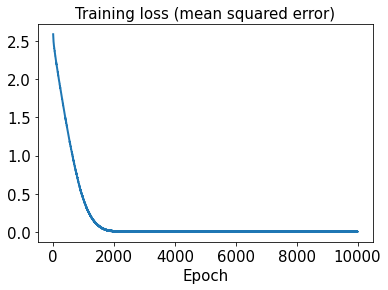

In [34]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

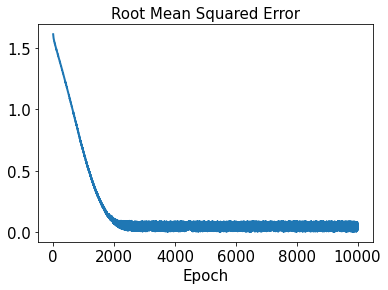

In [35]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [36]:
decoded_sensor_train2 = sensor_pred2.predict(t_train)

In [37]:
decoded_sensor_test2 = sensor_pred2.predict(t_test)

In [38]:
error_train_abs2 = np.abs(decoded_sensor_train2 - x_train2)

In [39]:
error_test_abs2 = np.abs(decoded_sensor_test2 - x_test2)

In [40]:
l2_error_sensor_train2 = np.sqrt(np.sum((decoded_sensor_train2 - x_train2)**2) / np.sum(x_train2**2))
print(l2_error_sensor_train2)

0.0630424919141383


In [41]:
l2_error_sensor_test2 = np.sqrt(np.sum((decoded_sensor_test2 - x_test2)**2) / np.sum(x_test2**2))
print(l2_error_sensor_test2)

0.06532461484840088


In [42]:
error_train_abs2

array([[[6.40179634e-03],
        [2.52846193e-02],
        [1.43031912e-01],
        [1.03333836e-01],
        [7.19270229e-03],
        [2.28575897e-02],
        [3.80253839e-02],
        [4.82858944e-02],
        [1.34961176e-02],
        [3.48027992e-02],
        [9.27395153e-02],
        [1.45838957e-01],
        [2.00332451e-02],
        [9.80216980e-03],
        [8.06984711e-02],
        [6.87268257e-03]],

       [[1.31401427e-01],
        [8.53969049e-02],
        [1.82984085e-01],
        [1.13485856e-01],
        [7.05125523e-02],
        [1.08711572e-01],
        [9.76733398e-02],
        [8.39159441e-02],
        [1.44312711e-01],
        [9.49128103e-02],
        [2.38589001e-02],
        [2.18631454e-01],
        [1.46610661e-01],
        [9.75978327e-02],
        [1.64640613e-01],
        [8.73563480e-02]],

       [[8.20357323e-03],
        [1.72381592e-02],
        [8.81316948e-02],
        [6.28550816e-02],
        [5.06057262e-03],
        [1.65323925e-02],
        

In [43]:
sensor_pred3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start3 = datetime.datetime.now()
history3 = sensor_pred3.fit(t_train, x_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 10ms/step - loss: 3.8719 - rmse: 1.9676
Epoch 2/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.8232 - rmse: 1.9552
Epoch 3/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.7944 - rmse: 1.9478
Epoch 4/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.7769 - rmse: 1.9433
Epoch 5/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.7633 - rmse: 1.9398
Epoch 6/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.7525 - rmse: 1.9370
Epoch 7/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.7427 - rmse: 1.9345
Epoch 8/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.7330 - rmse: 1.9320
Epoch 9/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.7226 - rmse: 1.9293
Epoch 10/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.7130 - rmse: 1.9268
Epoch 11/10000
2/2 [====================

2/2 [==============================] - 0s 8ms/step - loss: 3.2218 - rmse: 1.7948
Epoch 87/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2191 - rmse: 1.7940
Epoch 88/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2127 - rmse: 1.7923
Epoch 89/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2089 - rmse: 1.7912
Epoch 90/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2013 - rmse: 1.7891
Epoch 91/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1983 - rmse: 1.7883
Epoch 92/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1930 - rmse: 1.7868
Epoch 93/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1867 - rmse: 1.7850
Epoch 94/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1822 - rmse: 1.7838
Epoch 95/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1775 - rmse: 1.7824
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 11ms/step - loss: 2.8156 - rmse: 1.6778
Epoch 171/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8135 - rmse: 1.6772
Epoch 172/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8042 - rmse: 1.6744
Epoch 173/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7999 - rmse: 1.6732
Epoch 174/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.8002 - rmse: 1.6732
Epoch 175/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7940 - rmse: 1.6714
Epoch 176/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7876 - rmse: 1.6695
Epoch 177/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7820 - rmse: 1.6678
Epoch 178/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7776 - rmse: 1.6665
Epoch 179/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7748 - rmse: 1.6656
Epoch 180/10000
2/2 [====================

2/2 [==============================] - 0s 11ms/step - loss: 2.4705 - rmse: 1.5716
Epoch 255/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4659 - rmse: 1.5702
Epoch 256/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4671 - rmse: 1.5705
Epoch 257/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4597 - rmse: 1.5682
Epoch 258/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4580 - rmse: 1.5676
Epoch 259/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4509 - rmse: 1.5654
Epoch 260/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4473 - rmse: 1.5642
Epoch 261/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4436 - rmse: 1.5630
Epoch 262/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4415 - rmse: 1.5624
Epoch 263/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4411 - rmse: 1.5622
Epoch 264/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 2.1829 - rmse: 1.4773
Epoch 339/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1796 - rmse: 1.4762
Epoch 340/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1732 - rmse: 1.4740
Epoch 341/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1680 - rmse: 1.4723
Epoch 342/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1657 - rmse: 1.4715
Epoch 343/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1615 - rmse: 1.4701
Epoch 344/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1622 - rmse: 1.4703
Epoch 345/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1561 - rmse: 1.4682
Epoch 346/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1528 - rmse: 1.4671
Epoch 347/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1540 - rmse: 1.4675
Epoch 348/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 1.9299 - rmse: 1.3890
Epoch 423/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9282 - rmse: 1.3884
Epoch 424/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9244 - rmse: 1.3871
Epoch 425/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9217 - rmse: 1.3861
Epoch 426/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9191 - rmse: 1.3851
Epoch 427/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9163 - rmse: 1.3841
Epoch 428/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9162 - rmse: 1.3841
Epoch 429/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9138 - rmse: 1.3832
Epoch 430/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9118 - rmse: 1.3825
Epoch 431/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9135 - rmse: 1.3831
Epoch 432/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 1.7152 - rmse: 1.3095
Epoch 507/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7157 - rmse: 1.3097
Epoch 508/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7137 - rmse: 1.3089
Epoch 509/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7089 - rmse: 1.3071
Epoch 510/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7066 - rmse: 1.3062
Epoch 511/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7100 - rmse: 1.3075
Epoch 512/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7006 - rmse: 1.3039
Epoch 513/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7053 - rmse: 1.3057
Epoch 514/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6958 - rmse: 1.3021
Epoch 515/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6937 - rmse: 1.3013
Epoch 516/10000
2/2 [==================

2/2 [==============================] - 0s 11ms/step - loss: 1.5263 - rmse: 1.2353
Epoch 591/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5251 - rmse: 1.2347
Epoch 592/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5205 - rmse: 1.2329
Epoch 593/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5197 - rmse: 1.2326
Epoch 594/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5245 - rmse: 1.2345
Epoch 595/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5168 - rmse: 1.2314
Epoch 596/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5132 - rmse: 1.2299
Epoch 597/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5114 - rmse: 1.2292
Epoch 598/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5077 - rmse: 1.2277
Epoch 599/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5139 - rmse: 1.2302
Epoch 600/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 1.3605 - rmse: 1.1662
Epoch 675/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3514 - rmse: 1.1623
Epoch 676/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3494 - rmse: 1.1615
Epoch 677/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3477 - rmse: 1.1607
Epoch 678/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3456 - rmse: 1.1598
Epoch 679/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.3440 - rmse: 1.1591
Epoch 680/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.3456 - rmse: 1.1598
Epoch 681/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3451 - rmse: 1.1596
Epoch 682/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3381 - rmse: 1.1566
Epoch 683/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3362 - rmse: 1.1558
Epoch 684/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 1.1994 - rmse: 1.0950
Epoch 759/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1977 - rmse: 1.0942
Epoch 760/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1958 - rmse: 1.0933
Epoch 761/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1953 - rmse: 1.0931
Epoch 762/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1927 - rmse: 1.0919
Epoch 763/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1923 - rmse: 1.0917
Epoch 764/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1893 - rmse: 1.0903
Epoch 765/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1872 - rmse: 1.0894
Epoch 766/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1858 - rmse: 1.0887
Epoch 767/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1872 - rmse: 1.0894
Epoch 768/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 1.0616 - rmse: 1.0301
Epoch 843/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0625 - rmse: 1.0305
Epoch 844/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0583 - rmse: 1.0285
Epoch 845/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0571 - rmse: 1.0279
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0579 - rmse: 1.0283
Epoch 847/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0556 - rmse: 1.0272
Epoch 848/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0535 - rmse: 1.0262
Epoch 849/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0520 - rmse: 1.0255
Epoch 850/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0495 - rmse: 1.0242
Epoch 851/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0508 - rmse: 1.0249
Epoch 852/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.9421 - rmse: 0.9704
Epoch 927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9388 - rmse: 0.9687
Epoch 928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9340 - rmse: 0.9662
Epoch 929/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9340 - rmse: 0.9662
Epoch 930/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9375 - rmse: 0.9680
Epoch 931/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9322 - rmse: 0.9653
Epoch 932/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.9282 - rmse: 0.9632
Epoch 933/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.9271 - rmse: 0.9626
Epoch 934/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9274 - rmse: 0.9628
Epoch 935/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.9275 - rmse: 0.9628
Epoch 936/10000
2/2 [==================

Epoch 1010/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8251 - rmse: 0.9081
Epoch 1011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8235 - rmse: 0.9072
Epoch 1012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8250 - rmse: 0.9080
Epoch 1013/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8221 - rmse: 0.9065
Epoch 1014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8211 - rmse: 0.9059
Epoch 1015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8175 - rmse: 0.9039
Epoch 1016/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8176 - rmse: 0.9039
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8145 - rmse: 0.9022
Epoch 1018/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8164 - rmse: 0.9033
Epoch 1019/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8182 - rmse: 0.9043
Epoch 1020/10

2/2 [==============================] - 0s 12ms/step - loss: 0.7284 - rmse: 0.8532
Epoch 1094/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7228 - rmse: 0.8499
Epoch 1095/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7199 - rmse: 0.8482
Epoch 1096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7186 - rmse: 0.8474
Epoch 1097/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7174 - rmse: 0.8467
Epoch 1098/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7227 - rmse: 0.8498
Epoch 1099/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7163 - rmse: 0.8461
Epoch 1100/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7148 - rmse: 0.8452
Epoch 1101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7211 - rmse: 0.8489
Epoch 1102/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7154 - rmse: 0.8456
Epoch 1103/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.6259 - rmse: 0.7909
Epoch 1177/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6261 - rmse: 0.7910
Epoch 1178/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6292 - rmse: 0.7929
Epoch 1179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6256 - rmse: 0.7907
Epoch 1180/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6220 - rmse: 0.7884
Epoch 1181/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6292 - rmse: 0.7929
Epoch 1182/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6210 - rmse: 0.7878
Epoch 1183/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6225 - rmse: 0.7887
Epoch 1184/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6194 - rmse: 0.7868
Epoch 1185/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6164 - rmse: 0.7848
Epoch 1186/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.5479 - rmse: 0.7399
Epoch 1260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5396 - rmse: 0.7343
Epoch 1261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5405 - rmse: 0.7349
Epoch 1262/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5384 - rmse: 0.7335
Epoch 1263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5361 - rmse: 0.7319
Epoch 1264/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5372 - rmse: 0.7326
Epoch 1265/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5368 - rmse: 0.7324
Epoch 1266/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5333 - rmse: 0.7300
Epoch 1267/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5322 - rmse: 0.7293
Epoch 1268/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5367 - rmse: 0.7323
Epoch 1269/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.4637 - rmse: 0.6807
Epoch 1343/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4644 - rmse: 0.6812
Epoch 1344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4623 - rmse: 0.6796
Epoch 1345/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4591 - rmse: 0.6773
Epoch 1346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4587 - rmse: 0.6769
Epoch 1347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4573 - rmse: 0.6759
Epoch 1348/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4604 - rmse: 0.6782
Epoch 1349/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4640 - rmse: 0.6809
Epoch 1350/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4548 - rmse: 0.6741
Epoch 1351/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4539 - rmse: 0.6734
Epoch 1352/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.3931 - rmse: 0.6266
Epoch 1426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3974 - rmse: 0.6300
Epoch 1427/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3949 - rmse: 0.6281
Epoch 1428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3905 - rmse: 0.6245
Epoch 1429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3910 - rmse: 0.6250
Epoch 1430/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3904 - rmse: 0.6245
Epoch 1431/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3881 - rmse: 0.6226
Epoch 1432/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3873 - rmse: 0.6220
Epoch 1433/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3887 - rmse: 0.6231
Epoch 1434/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3859 - rmse: 0.6209
Epoch 1435/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.3318 - rmse: 0.5757
Epoch 1509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3346 - rmse: 0.5781
Epoch 1510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3361 - rmse: 0.5794
Epoch 1511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3353 - rmse: 0.5787
Epoch 1512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3285 - rmse: 0.5728
Epoch 1513/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3274 - rmse: 0.5718
Epoch 1514/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3295 - rmse: 0.5737
Epoch 1515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3295 - rmse: 0.5736
Epoch 1516/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3271 - rmse: 0.5716
Epoch 1517/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3256 - rmse: 0.5702
Epoch 1518/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.2759 - rmse: 0.5248
Epoch 1592/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2789 - rmse: 0.5277
Epoch 1593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2754 - rmse: 0.5244
Epoch 1594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2740 - rmse: 0.5230
Epoch 1595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2750 - rmse: 0.5240
Epoch 1596/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2729 - rmse: 0.5220
Epoch 1597/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2759 - rmse: 0.5248
Epoch 1598/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2732 - rmse: 0.5223
Epoch 1599/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2728 - rmse: 0.5219
Epoch 1600/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2701 - rmse: 0.5193
Epoch 1601/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.2254 - rmse: 0.4743
Epoch 1675/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2264 - rmse: 0.4753
Epoch 1676/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2276 - rmse: 0.4766
Epoch 1677/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2264 - rmse: 0.4754
Epoch 1678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2244 - rmse: 0.4732
Epoch 1679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2256 - rmse: 0.4746
Epoch 1680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2239 - rmse: 0.4727
Epoch 1681/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2217 - rmse: 0.4704
Epoch 1682/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2227 - rmse: 0.4714
Epoch 1683/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2209 - rmse: 0.4696
Epoch 1684/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.1872 - rmse: 0.4322
Epoch 1758/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1859 - rmse: 0.4306
Epoch 1759/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1869 - rmse: 0.4318
Epoch 1760/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1855 - rmse: 0.4302
Epoch 1761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1825 - rmse: 0.4267
Epoch 1762/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1833 - rmse: 0.4276
Epoch 1763/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1855 - rmse: 0.4302
Epoch 1764/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1845 - rmse: 0.4290
Epoch 1765/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1819 - rmse: 0.4260
Epoch 1766/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1831 - rmse: 0.4274
Epoch 1767/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.1485 - rmse: 0.3848
Epoch 1841/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1515 - rmse: 0.3887
Epoch 1842/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1483 - rmse: 0.3845
Epoch 1843/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1559 - rmse: 0.3943
Epoch 1844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1471 - rmse: 0.3830
Epoch 1845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1502 - rmse: 0.3871
Epoch 1846/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1466 - rmse: 0.3823
Epoch 1847/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1455 - rmse: 0.3809
Epoch 1848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1459 - rmse: 0.3814
Epoch 1849/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1475 - rmse: 0.3835
Epoch 1850/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.1202 - rmse: 0.3461
Epoch 1924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1185 - rmse: 0.3437
Epoch 1925/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1194 - rmse: 0.3449
Epoch 1926/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1183 - rmse: 0.3434
Epoch 1927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1193 - rmse: 0.3448
Epoch 1928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1167 - rmse: 0.3410
Epoch 1929/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1178 - rmse: 0.3427
Epoch 1930/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1183 - rmse: 0.3434
Epoch 1931/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1161 - rmse: 0.3402
Epoch 1932/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1181 - rmse: 0.3430
Epoch 1933/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0967 - rmse: 0.3103
Epoch 2007/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0984 - rmse: 0.3130
Epoch 2008/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0928 - rmse: 0.3039
Epoch 2009/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0963 - rmse: 0.3096
Epoch 2010/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0939 - rmse: 0.3057
Epoch 2011/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0947 - rmse: 0.3071
Epoch 2012/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0933 - rmse: 0.3048
Epoch 2013/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0936 - rmse: 0.3052
Epoch 2014/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0923 - rmse: 0.3032
Epoch 2015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0926 - rmse: 0.3036
Epoch 2016/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0763 - rmse: 0.2756
Epoch 2090/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0755 - rmse: 0.2740
Epoch 2091/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0736 - rmse: 0.2705
Epoch 2092/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0751 - rmse: 0.2732
Epoch 2093/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0755 - rmse: 0.2741
Epoch 2094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0728 - rmse: 0.2690
Epoch 2095/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0712 - rmse: 0.2661
Epoch 2096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0749 - rmse: 0.2730
Epoch 2097/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0749 - rmse: 0.2730
Epoch 2098/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0715 - rmse: 0.2667
Epoch 2099/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0638 - rmse: 0.2517
Epoch 2173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0625 - rmse: 0.2492
Epoch 2174/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0591 - rmse: 0.2423
Epoch 2175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0569 - rmse: 0.2376
Epoch 2176/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0641 - rmse: 0.2524
Epoch 2177/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0555 - rmse: 0.2347
Epoch 2178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0569 - rmse: 0.2377
Epoch 2179/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0586 - rmse: 0.2412
Epoch 2180/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0562 - rmse: 0.2362
Epoch 2181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0558 - rmse: 0.2354
Epoch 2182/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0459 - rmse: 0.2133
Epoch 2256/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0422 - rmse: 0.2045
Epoch 2257/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0450 - rmse: 0.2112
Epoch 2258/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0420 - rmse: 0.2040
Epoch 2259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0419 - rmse: 0.2038
Epoch 2260/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0458 - rmse: 0.2130
Epoch 2261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0431 - rmse: 0.2065
Epoch 2262/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0423 - rmse: 0.2046
Epoch 2263/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0445 - rmse: 0.2100
Epoch 2264/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0425 - rmse: 0.2051
Epoch 2265/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0323 - rmse: 0.1786
Epoch 2339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0362 - rmse: 0.1893
Epoch 2340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0323 - rmse: 0.1787
Epoch 2341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0329 - rmse: 0.1803
Epoch 2342/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0330 - rmse: 0.1806
Epoch 2343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0332 - rmse: 0.1810
Epoch 2344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0351 - rmse: 0.1862
Epoch 2345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0333 - rmse: 0.1813
Epoch 2346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0316 - rmse: 0.1766
Epoch 2347/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0322 - rmse: 0.1784
Epoch 2348/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0243 - rmse: 0.1546
Epoch 2422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0245 - rmse: 0.1552
Epoch 2423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0272 - rmse: 0.1638
Epoch 2424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0241 - rmse: 0.1538
Epoch 2425/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0273 - rmse: 0.1641
Epoch 2426/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0238 - rmse: 0.1530
Epoch 2427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0239 - rmse: 0.1533
Epoch 2428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0246 - rmse: 0.1555
Epoch 2429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0253 - rmse: 0.1579
Epoch 2430/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0273 - rmse: 0.1640
Epoch 2431/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0196 - rmse: 0.1385
Epoch 2505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0230 - rmse: 0.1503
Epoch 2506/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0213 - rmse: 0.1445
Epoch 2507/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0209 - rmse: 0.1430
Epoch 2508/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0177 - rmse: 0.1314
Epoch 2509/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0214 - rmse: 0.1449
Epoch 2510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0172 - rmse: 0.1295
Epoch 2511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0213 - rmse: 0.1445
Epoch 2512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0180 - rmse: 0.1327
Epoch 2513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0209 - rmse: 0.1433
Epoch 2514/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0156 - rmse: 0.1234
Epoch 2588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0201 - rmse: 0.1405
Epoch 2589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0129 - rmse: 0.1119
Epoch 2590/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0131 - rmse: 0.1129
Epoch 2591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0166 - rmse: 0.1274
Epoch 2592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0189 - rmse: 0.1359
Epoch 2593/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0153 - rmse: 0.1222
Epoch 2594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0133 - rmse: 0.1135
Epoch 2595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0132 - rmse: 0.1131
Epoch 2596/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0125 - rmse: 0.1099
Epoch 2597/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0980
Epoch 2671/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0928
Epoch 2672/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0102 - rmse: 0.0989
Epoch 2673/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0930
Epoch 2674/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0092 - rmse: 0.0936
Epoch 2675/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0175 - rmse: 0.1307
Epoch 2676/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0940
Epoch 2677/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0111 - rmse: 0.1033
Epoch 2678/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0123 - rmse: 0.1089
Epoch 2679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0944
Epoch 2680/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0827
Epoch 2754/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0856
Epoch 2755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0110 - rmse: 0.1029
Epoch 2756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0799
Epoch 2757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0800
Epoch 2758/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0812
Epoch 2759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0861
Epoch 2760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0793
Epoch 2761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0106 - rmse: 0.1010
Epoch 2762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0791
Epoch 2763/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0074 - rmse: 0.0835
Epoch 2837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0833
Epoch 2838/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0656
Epoch 2839/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0680
Epoch 2840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0744
Epoch 2841/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0649
Epoch 2842/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0844
Epoch 2843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.0985
Epoch 2844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0651
Epoch 2845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0894
Epoch 2846/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0110 - rmse: 0.1028
Epoch 2920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0569
Epoch 2921/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0790
Epoch 2922/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0717
Epoch 2923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0620
Epoch 2924/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0608
Epoch 2925/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0555
Epoch 2926/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0549
Epoch 2927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0546
Epoch 2928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0785
Epoch 2929/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0605
Epoch 3003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0482
Epoch 3004/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0729
Epoch 3005/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0602
Epoch 3006/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0111 - rmse: 0.1037
Epoch 3007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0778
Epoch 3008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0492
Epoch 3009/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0081 - rmse: 0.0880
Epoch 3010/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0725
Epoch 3011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0731
Epoch 3012/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0552
Epoch 3086/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0399
Epoch 3087/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0399
Epoch 3088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0549
Epoch 3089/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0653
Epoch 3090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0652
Epoch 3091/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0397
Epoch 3092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0560
Epoch 3093/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0653
Epoch 3094/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0396
Epoch 3095/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0806
Epoch 3169/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0695
Epoch 3170/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0626
Epoch 3171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0510
Epoch 3172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0551
Epoch 3173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0312
Epoch 3174/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0644
Epoch 3175/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0595
Epoch 3176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0595
Epoch 3177/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0099 - rmse: 0.0978
Epoch 3178/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0550
Epoch 3252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0438
Epoch 3253/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0264
Epoch 3254/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0595
Epoch 3255/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0259
Epoch 3256/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0356
Epoch 3257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0619
Epoch 3258/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.9495e-04 - rmse: 0.0248
Epoch 3259/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0356
Epoch 3260/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5667e-04 - rmse: 0.0240
Epoch 3261/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0426
Epoch 3335/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0278
Epoch 3336/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0347
Epoch 3337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0613
Epoch 3338/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0074 - rmse: 0.0835
Epoch 3339/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0570
Epoch 3340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0389
Epoch 3341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0691
Epoch 3342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0510
Epoch 3343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0461
Epoch 3344/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0821
Epoch 3417/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0648
Epoch 3418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0315
Epoch 3419/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0448
Epoch 3420/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0461
Epoch 3421/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0515
Epoch 3422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0765
Epoch 3423/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0445
Epoch 3424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0649
Epoch 3425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0462
Epoch 3426/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0357
Epoch 3499/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0580
Epoch 3500/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0331
Epoch 3501/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.3318e-04 - rmse: 0.0160
Epoch 3502/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.1128e-04 - rmse: 0.0153
Epoch 3503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0438
Epoch 3504/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.4756e-04 - rmse: 0.0131
Epoch 3505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0438
Epoch 3506/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0378
Epoch 3507/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.6428e-04 - rmse: 0.0197
Epoch 3508/100

2/2 [==============================] - 0s 12ms/step - loss: 5.3415e-04 - rmse: 0.0126
Epoch 3581/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5359e-04 - rmse: 0.0088
Epoch 3582/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0525
Epoch 3583/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0603
Epoch 3584/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0631
Epoch 3585/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0602
Epoch 3586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0652
Epoch 3587/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3595e-04 - rmse: 0.0190
Epoch 3588/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0493
Epoch 3589/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0872
Epoch 3590/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0575
Epoch 3663/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0273
Epoch 3664/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0575
Epoch 3665/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0431
Epoch 3666/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8242e-04 - rmse: 0.0176
Epoch 3667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0371
Epoch 3668/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0417
Epoch 3669/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0520
Epoch 3670/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0345
Epoch 3671/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0403
Epoch 3672/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0307
Epoch 3745/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0462
Epoch 3746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0576
Epoch 3747/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0522
Epoch 3748/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0416
Epoch 3749/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0810
Epoch 3750/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1175e-04 - rmse: 0.0118
Epoch 3751/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0317
Epoch 3752/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.8318e-04 - rmse: 0.0145
Epoch 3753/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7345e-04 - rmse: 0.0142
Epoch 3754/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0867
Epoch 3827/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0502
Epoch 3828/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0153e-04 - rmse: 0.0182
Epoch 3829/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.1133e-04 - rmse: 0.0119
Epoch 3830/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0421
Epoch 3831/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0869
Epoch 3832/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0561
Epoch 3833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0629
Epoch 3834/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0470
Epoch 3835/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7060e-04 - rmse: 0.0173
Epoch 3836/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 5.8399e-04 - rmse: 0.0147
Epoch 3909/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0417
Epoch 3910/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0492
Epoch 3911/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0745
Epoch 3912/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0804
Epoch 3913/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0090 - rmse: 0.0929
Epoch 3914/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.5597e-04 - rmse: 0.0137
Epoch 3915/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0875
Epoch 3916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0401
Epoch 3917/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0600
Epoch 3918/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0657
Epoch 3991/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.2465e-04 - rmse: 0.0214
Epoch 3992/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0346
Epoch 3993/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0578
Epoch 3994/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0375
Epoch 3995/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2586e-04 - rmse: 0.0076
Epoch 3996/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6480e-04 - rmse: 0.0099
Epoch 3997/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0092 - rmse: 0.0939
Epoch 3998/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0403
Epoch 3999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0419
Epoch 4000/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0638
Epoch 4073/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0750
Epoch 4074/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0933
Epoch 4075/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0431
Epoch 4076/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0578
Epoch 4077/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0605
Epoch 4078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0308
Epoch 4079/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0405
Epoch 4080/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0080 - rmse: 0.0871
Epoch 4081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0350
Epoch 4082/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0372
Epoch 4155/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0271
Epoch 4156/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0435
Epoch 4157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0365
Epoch 4158/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0366
Epoch 4159/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0572
Epoch 4160/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0315
Epoch 4161/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5914e-04 - rmse: 0.0172
Epoch 4162/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0489
Epoch 4163/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6576e-04 - rmse: 0.0101
Epoch 4164/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0871
Epoch 4237/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0316
Epoch 4238/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0530
Epoch 4239/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0648
Epoch 4240/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0359
Epoch 4241/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3176e-04 - rmse: 0.0192
Epoch 4242/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0531
Epoch 4243/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0945
Epoch 4244/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0574
Epoch 4245/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0754
Epoch 4246/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0367
Epoch 4319/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0268
Epoch 4320/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0488
Epoch 4321/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0516
Epoch 4322/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0266
Epoch 4323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0428
Epoch 4324/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0869
Epoch 4325/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0577
Epoch 4326/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0600
Epoch 4327/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2002e-04 - rmse: 0.0214
Epoch 4328/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0459
Epoch 4401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0629
Epoch 4402/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0369
Epoch 4403/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0460
Epoch 4404/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0522
Epoch 4405/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0397
Epoch 4406/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0268
Epoch 4407/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0597
Epoch 4408/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3031e-04 - rmse: 0.0130
Epoch 4409/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.7163e-04 - rmse: 0.0033
Epoch 4410/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0428
Epoch 4483/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0578
Epoch 4484/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0410
Epoch 4485/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0631
Epoch 4486/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0598
Epoch 4487/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6072e-04 - rmse: 0.0101
Epoch 4488/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0792e-04 - rmse: 0.0070
Epoch 4489/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0652
Epoch 4490/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0414
Epoch 4491/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0363
Epoch 4492/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 5.3332e-04 - rmse: 0.0132
Epoch 4565/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.3249e-04 - rmse: 0.0166
Epoch 4566/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6138e-04 - rmse: 0.0174
Epoch 4567/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0544
Epoch 4568/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.4269e-04 - rmse: 0.0092
Epoch 4569/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0596
Epoch 4570/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5107e-04 - rmse: 0.0198
Epoch 4571/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0487
Epoch 4572/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.2634e-04 - rmse: 0.0130
Epoch 4573/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0933
Epoch 4

2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0888
Epoch 4647/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0364
Epoch 4648/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0573
Epoch 4649/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0083 - rmse: 0.0890
Epoch 4650/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0623
Epoch 4651/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0599
Epoch 4652/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0491
Epoch 4653/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0264
Epoch 4654/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0316
Epoch 4655/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0431
Epoch 4656/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0586
Epoch 4729/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0497
Epoch 4730/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0434
Epoch 4731/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0812
Epoch 4732/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.4251e-04 - rmse: 0.0221
Epoch 4733/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0528
Epoch 4734/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0887
Epoch 4735/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0531
Epoch 4736/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5047e-04 - rmse: 0.0172
Epoch 4737/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0587
Epoch 4738/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 7.6604e-04 - rmse: 0.0203
Epoch 4811/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0398
Epoch 4812/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0573
Epoch 4813/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0270
Epoch 4814/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0399
Epoch 4815/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0649
Epoch 4816/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0301
Epoch 4817/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0629
Epoch 4818/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0649
Epoch 4819/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0430
Epoch 4820/10000
2/2 [=====

2/2 [==============================] - 0s 7ms/step - loss: 4.8789e-04 - rmse: 0.0116
Epoch 4893/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0345
Epoch 4894/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 4895/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.2977e-04 - rmse: 0.0219
Epoch 4896/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0328
Epoch 4897/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0092 - rmse: 0.0938
Epoch 4898/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0436
Epoch 4899/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9499e-04 - rmse: 0.0233
Epoch 4900/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0820
Epoch 4901/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0810
Epoch 4902/10000
2/2

2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0629
Epoch 4975/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0275
Epoch 4976/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0597
Epoch 4977/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0650
Epoch 4978/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6404e-04 - rmse: 0.0177
Epoch 4979/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0400
Epoch 4980/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0336
Epoch 4981/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0318
Epoch 4982/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4946e-04 - rmse: 0.0099
Epoch 4983/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0650
Epoch 4984/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0555
Epoch 5057/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0354
Epoch 5058/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0815
Epoch 5059/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0642
Epoch 5060/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0424
Epoch 5061/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2290e-04 - rmse: 0.0165
Epoch 5062/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0822
Epoch 5063/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0877
Epoch 5064/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0676
Epoch 5065/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0538
Epoch 5066/10000
2/2 [======

2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0810
Epoch 5139/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0323
Epoch 5140/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0344
Epoch 5141/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0274
Epoch 5142/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0273
Epoch 5143/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0520
Epoch 5144/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1117e-04 - rmse: 0.0080
Epoch 5145/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0624
Epoch 5146/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6387e-04 - rmse: 0.0108
Epoch 5147/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0091 - rmse: 0.0935
Epoch 5148/10000
2/2 [==

2/2 [==============================] - 0s 12ms/step - loss: 6.4283e-04 - rmse: 0.0172
Epoch 5221/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0648
Epoch 5222/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0575
Epoch 5223/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5660e-04 - rmse: 0.0176
Epoch 5224/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0574
Epoch 5225/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0931
Epoch 5226/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0577
Epoch 5227/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0320
Epoch 5228/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0521
Epoch 5229/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 5230/10000
2/2 [=

2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0377
Epoch 5303/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1184e-04 - rmse: 0.0191
Epoch 5304/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.8403e-04 - rmse: 0.0155
Epoch 5305/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7920e-04 - rmse: 0.0153
Epoch 5306/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.8272e-04 - rmse: 0.0209
Epoch 5307/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0405
Epoch 5308/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0809
Epoch 5309/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.2138e-04 - rmse: 0.0133
Epoch 5310/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0276
Epoch 5311/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0628
Epoch 5312/

2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0537
Epoch 5385/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0664
Epoch 5386/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0437
Epoch 5387/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0662
Epoch 5388/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0637
Epoch 5389/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0433
Epoch 5390/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0327
Epoch 5391/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0529
Epoch 5392/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0430
Epoch 5393/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0470
Epoch 5394/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0747
Epoch 5467/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3212e-04 - rmse: 0.0095
Epoch 5468/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0311
Epoch 5469/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0814
Epoch 5470/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0932
Epoch 5471/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0815
Epoch 5472/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0508
Epoch 5473/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0647
Epoch 5474/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0757
Epoch 5475/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0775e-04 - rmse: 0.0191
Epoch 5476/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 3.9022e-04 - rmse: 0.0070
Epoch 5549/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0490
Epoch 5550/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0520
Epoch 5551/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0867
Epoch 5552/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0525
Epoch 5553/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7400e-04 - rmse: 0.0153
Epoch 5554/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0753
Epoch 5555/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0416
Epoch 5556/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.0456e-04 - rmse: 0.0191
Epoch 5557/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0600
Epoch 5558/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 4.3545e-04 - rmse: 0.0098
Epoch 5631/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0518
Epoch 5632/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0649
Epoch 5633/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0517
Epoch 5634/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0648
Epoch 5635/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0628
Epoch 5636/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0517
Epoch 5637/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0363
Epoch 5638/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0335
Epoch 5639/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0267
Epoch 5640/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0266
Epoch 5713/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0933
Epoch 5714/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0930
Epoch 5715/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0810
Epoch 5716/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.3351e-04 - rmse: 0.0199
Epoch 5717/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4360e-04 - rmse: 0.0201
Epoch 5718/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0586
Epoch 5719/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0751
Epoch 5720/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0538
Epoch 5721/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0809
Epoch 5722/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0647
Epoch 5795/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0406
Epoch 5796/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3558e-04 - rmse: 0.0245
Epoch 5797/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0344
Epoch 5798/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0401
Epoch 5799/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0642
Epoch 5800/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0511
Epoch 5801/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0644
Epoch 5802/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0561
Epoch 5803/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0297
Epoch 5804/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0746
Epoch 5877/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0539e-04 - rmse: 0.0130
Epoch 5878/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0461
Epoch 5879/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0092 - rmse: 0.0939
Epoch 5880/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0522
Epoch 5881/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.0309e-04 - rmse: 0.0216
Epoch 5882/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9650e-04 - rmse: 0.0078
Epoch 5883/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0815
Epoch 5884/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0631
Epoch 5885/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0430
Epoch 5886/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0266
Epoch 5959/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.5004e-04 - rmse: 0.0040
Epoch 5960/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0458
Epoch 5961/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0364
Epoch 5962/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0544
Epoch 5963/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0363
Epoch 5964/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0488
Epoch 5965/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0398
Epoch 5966/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0747
Epoch 5967/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0652
Epoch 5968/10000
2/2 [=====

2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0812
Epoch 6041/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0332
Epoch 6042/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0525
Epoch 6043/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0758
Epoch 6044/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0579
Epoch 6045/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0422
Epoch 6046/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0205e-04 - rmse: 0.0130
Epoch 6047/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0337
Epoch 6048/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0467
Epoch 6049/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0631
Epoch 6050/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 6.0114e-04 - rmse: 0.0164
Epoch 6123/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2740e-04 - rmse: 0.0199
Epoch 6124/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0813
Epoch 6125/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0474
Epoch 6126/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0809
Epoch 6127/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0525
Epoch 6128/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.8569e-04 - rmse: 0.0124
Epoch 6129/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0279
Epoch 6130/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0371
Epoch 6131/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.6404e-04 - rmse: 0.0183
Epoch 6132/1000

2/2 [==============================] - 0s 7ms/step - loss: 7.7566e-04 - rmse: 0.0211
Epoch 6205/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.1454e-04 - rmse: 0.0169
Epoch 6206/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0515
Epoch 6207/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8894e-04 - rmse: 0.0214
Epoch 6208/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0936
Epoch 6209/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0935
Epoch 6210/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0531
Epoch 6211/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0416
Epoch 6212/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0634
Epoch 6213/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0404
Epoch 6214/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0865
Epoch 6287/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1521e-04 - rmse: 0.0197
Epoch 6288/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3909e-04 - rmse: 0.0105
Epoch 6289/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0466
Epoch 6290/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0317
Epoch 6291/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0548
Epoch 6292/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0573
Epoch 6293/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0745
Epoch 6294/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0603
Epoch 6295/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0648
Epoch 6296/10000
2/2 [=

2/2 [==============================] - 0s 9ms/step - loss: 6.0990e-04 - rmse: 0.0168
Epoch 6369/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0440
Epoch 6370/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0526
Epoch 6371/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0349
Epoch 6372/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0426
Epoch 6373/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0471
Epoch 6374/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0580
Epoch 6375/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.6835e-04 - rmse: 0.0210
Epoch 6376/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0092 - rmse: 0.0940
Epoch 6377/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0570
Epoch 6378/10000
2/2 [=

Epoch 6450/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.7447e-04 - rmse: 0.0070
Epoch 6451/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0274
Epoch 6452/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0747
Epoch 6453/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0633
Epoch 6454/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 6455/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8110e-04 - rmse: 0.0214
Epoch 6456/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.0859e-04 - rmse: 0.0091
Epoch 6457/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0810
Epoch 6458/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6277e-04 - rmse: 0.0184
Epoch 6459/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.03

2/2 [==============================] - 0s 12ms/step - loss: 3.3500e-04 - rmse: 0.0034
Epoch 6533/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0614e-04 - rmse: 0.0091
Epoch 6534/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0457
Epoch 6535/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0747
Epoch 6536/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8593e-04 - rmse: 0.0079
Epoch 6537/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0571
Epoch 6538/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0744
Epoch 6539/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0865
Epoch 6540/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0656
Epoch 6541/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.4031e-04 - rmse: 0.0204
Epoch 6542/100

2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0373
Epoch 6615/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0490
Epoch 6616/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0573
Epoch 6617/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0809
Epoch 6618/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2798e-04 - rmse: 0.0144
Epoch 6619/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.9253e-04 - rmse: 0.0084
Epoch 6620/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.3593e-04 - rmse: 0.0146
Epoch 6621/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9733e-04 - rmse: 0.0194
Epoch 6622/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0371
Epoch 6623/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0493
Epoch 6624/100

2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0597
Epoch 6697/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0623
Epoch 6698/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6172e-04 - rmse: 0.0185
Epoch 6699/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0572
Epoch 6700/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.4567e-04 - rmse: 0.0206
Epoch 6701/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0307
Epoch 6702/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0309
Epoch 6703/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0434
Epoch 6704/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6426e-04 - rmse: 0.0120
Epoch 6705/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0345
Epoch 6706/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 7.5328e-04 - rmse: 0.0208
Epoch 6779/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0343
Epoch 6780/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0655
Epoch 6781/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0942
Epoch 6782/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0482
Epoch 6783/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0557
Epoch 6784/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0876
Epoch 6785/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0576
Epoch 6786/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0493
Epoch 6787/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6764e-04 - rmse: 0.0122
Epoch 6788/10000
2/2 [=

2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0402
Epoch 6861/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0630
Epoch 6862/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3020e-04 - rmse: 0.0146
Epoch 6863/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0574
Epoch 6864/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0628
Epoch 6865/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.6333e-04 - rmse: 0.0211
Epoch 6866/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0516
Epoch 6867/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0599
Epoch 6868/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3399e-04 - rmse: 0.0204
Epoch 6869/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0572
Epoch 6870/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0544
Epoch 6943/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 6944/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0366
Epoch 6945/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0428
Epoch 6946/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0487
Epoch 6947/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0571
Epoch 6948/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0140e-04 - rmse: 0.0136
Epoch 6949/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0493e-04 - rmse: 0.0138
Epoch 6950/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0809
Epoch 6951/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0745
Epoch 6952/10000
2/2 [=

2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0280
Epoch 7025/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0283
Epoch 7026/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0522
Epoch 7027/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1952e-04 - rmse: 0.0143
Epoch 7028/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0404
Epoch 7029/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0328
Epoch 7030/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0418
Epoch 7031/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.5966e-04 - rmse: 0.0157
Epoch 7032/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0433
Epoch 7033/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5648e-04 - rmse: 0.0156
Epoch 7034/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0545
Epoch 7107/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6958e-04 - rmse: 0.0075
Epoch 7108/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0650
Epoch 7109/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2927e-04 - rmse: 0.0108
Epoch 7110/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0308
Epoch 7111/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0810
Epoch 7112/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0374
Epoch 7113/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0602e-04 - rmse: 0.0097
Epoch 7114/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0421
Epoch 7115/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0405
Epoch 7116/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0385
Epoch 7189/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0431
Epoch 7190/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0529
Epoch 7191/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0080 - rmse: 0.0875
Epoch 7192/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0391
Epoch 7193/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0429
Epoch 7194/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4850e-04 - rmse: 0.0209
Epoch 7195/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0880
Epoch 7196/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0871
Epoch 7197/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0326
Epoch 7198/10000
2/2 [=====

2/2 [==============================] - 0s 7ms/step - loss: 4.1851e-04 - rmse: 0.0104
Epoch 7271/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0748
Epoch 7272/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0315
Epoch 7273/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0572
Epoch 7274/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4660e-04 - rmse: 0.0117
Epoch 7275/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.4838e-04 - rmse: 0.0062
Epoch 7276/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6572e-04 - rmse: 0.0075
Epoch 7277/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0341
Epoch 7278/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0600
Epoch 7279/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0492
Epoch 7280/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0367
Epoch 7353/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 7354/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1095e-04 - rmse: 0.0174
Epoch 7355/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0804
Epoch 7356/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0318
Epoch 7357/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0311e-04 - rmse: 0.0098
Epoch 7358/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.0030e-04 - rmse: 0.0096
Epoch 7359/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0651
Epoch 7360/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0746
Epoch 7361/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0413
Epoch 7362/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 3.8108e-04 - rmse: 0.0086
Epoch 7435/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0580
Epoch 7436/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0521
Epoch 7437/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0576
Epoch 7438/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.5418e-04 - rmse: 0.0212
Epoch 7439/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 7440/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0340
Epoch 7441/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1731e-04 - rmse: 0.0203
Epoch 7442/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0571e-04 - rmse: 0.0141
Epoch 7443/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8818e-04 - rmse: 0.0135
Epoch 7444/

2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0384
Epoch 7517/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0431
Epoch 7518/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0503
Epoch 7519/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0446
Epoch 7520/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0323
Epoch 7521/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0294e-04 - rmse: 0.0173
Epoch 7522/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0554
Epoch 7523/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0330
Epoch 7524/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1655e-04 - rmse: 0.0106
Epoch 7525/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.0700e-04 - rmse: 0.0101
Epoch 7526/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 4.9810e-04 - rmse: 0.0140
Epoch 7599/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0651
Epoch 7600/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0367
Epoch 7601/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0520
Epoch 7602/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0745
Epoch 7603/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0550
Epoch 7604/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.3739e-04 - rmse: 0.0116
Epoch 7605/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0653
Epoch 7606/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0547
Epoch 7607/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0807
Epoch 7608/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0371
Epoch 7681/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0869
Epoch 7682/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0522
Epoch 7683/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7045e-04 - rmse: 0.0192
Epoch 7684/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 7685/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0277
Epoch 7686/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0369
Epoch 7687/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0279
Epoch 7688/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0371
Epoch 7689/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0467
Epoch 7690/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0372
Epoch 7763/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.8047e-04 - rmse: 0.0168
Epoch 7764/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0634
Epoch 7765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0572
Epoch 7766/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.2038e-04 - rmse: 0.0110
Epoch 7767/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0363
Epoch 7768/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0630
Epoch 7769/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0625
Epoch 7770/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.8993e-04 - rmse: 0.0170
Epoch 7771/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0519
Epoch 7772/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0489
Epoch 7845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0266
Epoch 7846/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0806
Epoch 7847/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.3111e-04 - rmse: 0.0182
Epoch 7848/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9175e-04 - rmse: 0.0097
Epoch 7849/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7396e-04 - rmse: 0.0166
Epoch 7850/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0521
Epoch 7851/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0306
Epoch 7852/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.8420e-04 - rmse: 0.0136
Epoch 7853/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3758e-04 - rmse: 0.0063
Epoch 7854

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 7927/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.4169e-04 - rmse: 0.0120
Epoch 7928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0751
Epoch 7929/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0576
Epoch 7930/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0747
Epoch 7931/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.1128e-04 - rmse: 0.0204
Epoch 7932/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4442e-04 - rmse: 0.0187
Epoch 7933/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0500
Epoch 7934/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0637
Epoch 7935/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0871
Epoch 7936/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 5.2245e-04 - rmse: 0.0151
Epoch 8009/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0311
Epoch 8010/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.4694e-04 - rmse: 0.0213
Epoch 8011/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0549
Epoch 8012/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4855e-04 - rmse: 0.0124
Epoch 8013/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0437
Epoch 8014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0604
Epoch 8015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0938
Epoch 8016/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0508
Epoch 8017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0872
Epoch 8018/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 6.1914e-04 - rmse: 0.0181
Epoch 8091/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0527
Epoch 8092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 8093/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0529
Epoch 8094/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3639e-04 - rmse: 0.0211
Epoch 8095/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0328
Epoch 8096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0557
Epoch 8097/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9263e-04 - rmse: 0.0141
Epoch 8098/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5646e-04 - rmse: 0.0162
Epoch 8099/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0535
Epoch 8100/100

2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 8173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0351
Epoch 8174/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1260e-04 - rmse: 0.0110
Epoch 8175/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0498
Epoch 8176/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.6379e-04 - rmse: 0.0165
Epoch 8177/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5850e-04 - rmse: 0.0192
Epoch 8178/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0605
Epoch 8179/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0380
Epoch 8180/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0579
Epoch 8181/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0875
Epoch 8182/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0599
Epoch 8255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0571
Epoch 8256/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0431
Epoch 8257/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0745
Epoch 8258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 8259/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0400
Epoch 8260/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3542e-04 - rmse: 0.0068
Epoch 8261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0810
Epoch 8262/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0631
Epoch 8263/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6281e-04 - rmse: 0.0132
Epoch 8264/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 3.9664e-04 - rmse: 0.0104
Epoch 8337/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0650
Epoch 8338/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0370
Epoch 8339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 8340/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1836e-04 - rmse: 0.0055
Epoch 8341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0747
Epoch 8342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 8343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0744
Epoch 8344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0341
Epoch 8345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0808
Epoch 8346/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0337
Epoch 8419/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 8420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0431
Epoch 8421/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0598
Epoch 8422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0598
Epoch 8423/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0090 - rmse: 0.0932
Epoch 8424/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9528e-04 - rmse: 0.0104
Epoch 8425/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0089 - rmse: 0.0930
Epoch 8426/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0490
Epoch 8427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0268
Epoch 8428/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 4.6586e-04 - rmse: 0.0135
Epoch 8501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0597
Epoch 8502/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 8503/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0633
Epoch 8504/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0627
Epoch 8505/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.5166e-04 - rmse: 0.0082
Epoch 8506/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 8507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0461
Epoch 8508/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0649
Epoch 8509/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0805
Epoch 8510/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 5.2405e-04 - rmse: 0.0155
Epoch 8583/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6661e-04 - rmse: 0.0091
Epoch 8584/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0603
Epoch 8585/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0871
Epoch 8586/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0528
Epoch 8587/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0372
Epoch 8588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0602
Epoch 8589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0373
Epoch 8590/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0809
Epoch 8591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0585
Epoch 8592/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 4.6109e-04 - rmse: 0.0134
Epoch 8665/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2452e-04 - rmse: 0.0066
Epoch 8666/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9711e-04 - rmse: 0.0108
Epoch 8667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0547
Epoch 8668/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.5109e-04 - rmse: 0.0130
Epoch 8669/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0402
Epoch 8670/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7247e-04 - rmse: 0.0198
Epoch 8671/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4928e-04 - rmse: 0.0130
Epoch 8672/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0416
Epoch 8673/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0362
Epoch 

2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0429
Epoch 8747/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2028e-04 - rmse: 0.0064
Epoch 8748/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0488
Epoch 8749/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0429
Epoch 8750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0458
Epoch 8751/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0397
Epoch 8752/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0622
Epoch 8753/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0333
Epoch 8754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0486
Epoch 8755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 8756/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 5.1655e-04 - rmse: 0.0155
Epoch 8829/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0559
Epoch 8830/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9224e-04 - rmse: 0.0146
Epoch 8831/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0419
Epoch 8832/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0662
Epoch 8833/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.4558e-04 - rmse: 0.0216
Epoch 8834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0881
Epoch 8835/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0427
Epoch 8836/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.5987e-04 - rmse: 0.0220
Epoch 8837/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.6488e-04 - rmse: 0.0197
Epoch 8838

2/2 [==============================] - 0s 8ms/step - loss: 8.5427e-04 - rmse: 0.0240
Epoch 8911/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.4714e-04 - rmse: 0.0259
Epoch 8912/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - rmse: 0.0959
Epoch 8913/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.3111e-04 - rmse: 0.0236
Epoch 8914/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0391
Epoch 8915/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0446
Epoch 8916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0359
Epoch 8917/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0668
Epoch 8918/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0879
Epoch 8919/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7542e-04 - rmse: 0.0200
Epoch 8920/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0479
Epoch 8993/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.0800e-04 - rmse: 0.0183
Epoch 8994/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.9058e-04 - rmse: 0.0147
Epoch 8995/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0661
Epoch 8996/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0419
Epoch 8997/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6458e-04 - rmse: 0.0221
Epoch 8998/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.5289e-04 - rmse: 0.0219
Epoch 8999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0331
Epoch 9000/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0637
Epoch 9001/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.7835e-04 - rmse: 0.0225
Epoch 9002

2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0651
Epoch 9075/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0429
Epoch 9076/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0518
Epoch 9077/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 9078/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0597
Epoch 9079/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0810
Epoch 9080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0572
Epoch 9081/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3081e-04 - rmse: 0.0076
Epoch 9082/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0868
Epoch 9083/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0517
Epoch 9084/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 9157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 9158/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7882e-04 - rmse: 0.0202
Epoch 9159/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.7815e-04 - rmse: 0.0225
Epoch 9160/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.6069e-04 - rmse: 0.0197
Epoch 9161/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0608
Epoch 9162/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0431
Epoch 9163/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0419
Epoch 9164/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0448
Epoch 9165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0361
Epoch 9166/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0750
Epoch 9239/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.0208e-04 - rmse: 0.0182
Epoch 9240/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0631
Epoch 9241/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.9850e-04 - rmse: 0.0114
Epoch 9242/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0308
Epoch 9243/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0547
Epoch 9244/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0432
Epoch 9245/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0575
Epoch 9246/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2404e-04 - rmse: 0.0125
Epoch 9247/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0746
Epoch 9248/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 5.0180e-04 - rmse: 0.0153
Epoch 9321/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0550
Epoch 9322/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.9052e-04 - rmse: 0.0269
Epoch 9323/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0433
Epoch 9324/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 9325/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0599
Epoch 9326/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.5991e-04 - rmse: 0.0139
Epoch 9327/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4079e-04 - rmse: 0.0132
Epoch 9328/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0625
Epoch 9329/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0364
Epoch 9330/100

2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0657
Epoch 9403/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.9807e-04 - rmse: 0.0182
Epoch 9404/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0280
Epoch 9405/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0625
Epoch 9406/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0805
Epoch 9407/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0634
Epoch 9408/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.1161e-04 - rmse: 0.0186
Epoch 9409/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0652
Epoch 9410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0940
Epoch 9411/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8161e-04 - rmse: 0.0204
Epoch 9412/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 4.2537e-04 - rmse: 0.0127
Epoch 9485/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0366
Epoch 9486/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9467e-04 - rmse: 0.0055
Epoch 9487/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0515
Epoch 9488/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0428
Epoch 9489/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0621
Epoch 9490/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0518
Epoch 9491/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5824e-04 - rmse: 0.0199
Epoch 9492/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0428
Epoch 9493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0573
Epoch 9494/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0570
Epoch 9567/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0572
Epoch 9568/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 9569/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0487
Epoch 9570/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0521
Epoch 9571/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0303
Epoch 9572/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.7497e-04 - rmse: 0.0267
Epoch 9573/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0488
Epoch 9574/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.3939e-04 - rmse: 0.0166
Epoch 9575/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0517
Epoch 9576/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0940
Epoch 9649/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0804
Epoch 9650/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0401
Epoch 9651/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0600
Epoch 9652/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0410
Epoch 9653/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 9654/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4377e-04 - rmse: 0.0135
Epoch 9655/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3910e-04 - rmse: 0.0089
Epoch 9656/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0370
Epoch 9657/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7096e-04 - rmse: 0.0105
Epoch 9658/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 9731/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0637
Epoch 9732/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0381
Epoch 9733/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0089 - rmse: 0.0932
Epoch 9734/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0579
Epoch 9735/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0604
Epoch 9736/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8090e-04 - rmse: 0.0110
Epoch 9737/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0580
Epoch 9738/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0326
Epoch 9739/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0497
Epoch 9740/10000
2/2 [====

2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 9813/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0937
Epoch 9814/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1062e-04 - rmse: 0.0124
Epoch 9815/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0498
Epoch 9816/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0524
Epoch 9817/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0875
Epoch 9818/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.5118e-04 - rmse: 0.0222
Epoch 9819/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0422
Epoch 9820/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0522
Epoch 9821/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0750
Epoch 9822/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0437
Epoch 9895/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0089 - rmse: 0.0932
Epoch 9896/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0600
Epoch 9897/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 9898/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0521
Epoch 9899/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.5857e-04 - rmse: 0.0101
Epoch 9900/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0625
Epoch 9901/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0317
Epoch 9902/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0746
Epoch 9903/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0417
Epoch 9904/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0300
Epoch 9977/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0744
Epoch 9978/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0929
Epoch 9979/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0657
Epoch 9980/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6168e-04 - rmse: 0.0144
Epoch 9981/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0547
Epoch 9982/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9588e-04 - rmse: 0.0119
Epoch 9983/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.3219e-04 - rmse: 0.0133
Epoch 9984/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.5239e-04 - rmse: 0.0173
Epoch 9985/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0517
Epoch 9986/1000

In [45]:
time3_sensor = end3 - start3
print("Training time (Case 3, sensor prediction):", time3_sensor)

Training time (Case 3, sensor prediction): 0:03:40.183758


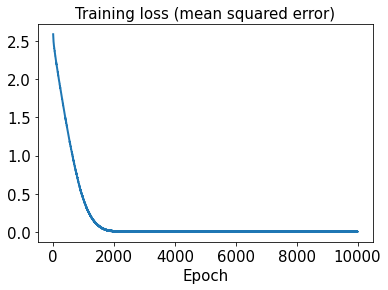

In [46]:
hist3 = history3.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

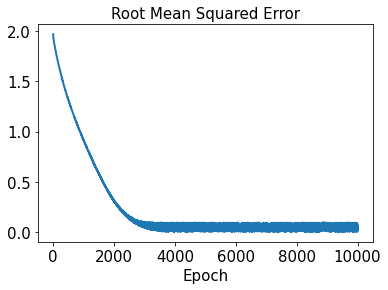

In [47]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
decoded_sensor_train3 = sensor_pred3.predict(t_train)

In [49]:
decoded_sensor_test3 = sensor_pred3.predict(t_test)

In [50]:
error_train_abs3 = np.abs(decoded_sensor_train3 - x_train3)

In [51]:
error_test_abs3 = np.abs(decoded_sensor_test3 - x_test3)

In [52]:
error_train_abs3

array([[[1.80634865e-03],
        [3.20912411e-02],
        [3.03371420e-03],
        [8.28948454e-03],
        [3.04543030e-02],
        [3.17832738e-02],
        [2.82672970e-03],
        [2.30026753e-02],
        [1.26062846e-03],
        [1.60051380e-02],
        [2.36467203e-02],
        [7.34106536e-03],
        [3.45701653e-02],
        [1.72105017e-02],
        [1.80345092e-02],
        [2.88599156e-02]],

       [[6.52224430e-02],
        [8.90380324e-03],
        [4.99792921e-02],
        [1.00366131e-01],
        [8.83264819e-02],
        [5.74408267e-02],
        [2.14953069e-02],
        [1.14854445e-01],
        [7.20985429e-02],
        [5.13823766e-02],
        [4.69220782e-02],
        [6.36401481e-02],
        [1.82369858e-01],
        [8.53085393e-02],
        [9.72539441e-02],
        [1.48447542e-01]],

       [[8.32605160e-03],
        [2.60694136e-02],
        [5.87041742e-03],
        [1.31105503e-02],
        [1.71826416e-02],
        [2.48748977e-02],
        

In [53]:
l2_error_sensor_train3 = np.sqrt(np.sum((decoded_sensor_train3 - x_train3)**2) / np.sum(x_train3**2))
print(l2_error_sensor_train3)

0.058584539304238965


In [54]:
l2_error_sensor_test3 = np.sqrt(np.sum((decoded_sensor_test3 - x_test3)**2) / np.sum(x_test3**2))
print(l2_error_sensor_test3)

0.058855707291733686
